### Setup and Data Loading

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

# Define file paths
data_csv_path = '/content/census-bureau.data'
header_file_path = '/content/census-bureau.columns'

# Read column names from the header file
with open(header_file_path, 'r') as f:
    column_names = [line.strip() for line in f if line.strip()]

# Read the data
df = pd.read_csv(data_csv_path, header=None, names=column_names)

FileNotFoundError: [Errno 2] No such file or directory: '/content/census-bureau.columns'

### Exploratory Data Analysis (EDA)

In [ ]:
print("\nFirst 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
display(df.info())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

print("\nMissing values:")
# Display missing values including '?' as a placeholder before replacement
print(df.isnull().sum())


First 5 rows of the DataFrame:


age                 class of worker  detailed industry recode  \
0   73                 Not in universe                         0   
1   58  Self-employed-not incorporated                         4   
2   18                 Not in universe                         0   
3    9                 Not in universe                         0   
4   10                 Not in universe                         0   

   detailed occupation recode                   education  wage per hour  \
0                           0        High school graduate              0   
1                          34  Some college but no degree              0   
2                           0                  10th grade              0   
3                           0                    Children              0   
4                           0                    Children              0   

  enroll in edu inst last wk   marital stat          major industry code  \
0            Not in universe        Widowed  Not in universe or children   
1            Not in universe       Divorced                 Construction   
2                High school  Never married  Not in universe or children   
3            Not in universe  Never married  Not in universe or children   
4            Not in universe  Never married  Not in universe or children   

                 major occupation code  ... country of birth father  \
0                      Not in universe  ...           United-States   
1  Precision production craft & repair  ...           United-States   
2                      Not in universe  ...                 Vietnam   
3                      Not in universe  ...           United-States   
4                      Not in universe  ...           United-States   

  country of birth mother country of birth self  \
0           United-States         United-States   
1           United-States         United-States   
2                 Vietnam               Vietnam   
3           United-States         United-States   
4           United-States         United-States   

                           citizenship own business or self employed  \
0    Native- Born in the United States                             0   
1    Native- Born in the United States                             0   
2  Foreign born- Not a citizen of U S                              0   
3    Native- Born in the United States                             0   
4    Native- Born in the United States                             0   

  fill inc questionnaire for veteran's admin  veterans benefits  \
0                            Not in universe                  2   
1                            Not in universe                  2   
2                            Not in universe                  2   
3                            Not in universe                  0   
4                            Not in universe                  0   

   weeks worked in year  year     label  
0                     0    95  - 50000.  
1                    52    94  - 50000.  
2                     0    95  - 50000.  
3                     0    94  - 50000.  
4                     0    94  - 50000.  

[5 rows x 42 columns]


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 no

None


Descriptive statistics for numerical columns:


age  detailed industry recode  detailed occupation recode  \
count  199523.000000             199523.000000               199523.000000   
mean       34.494199                 15.352320                   11.306556   
std        22.310895                 18.067129                   14.454204   
min         0.000000                  0.000000                    0.000000   
25%        15.000000                  0.000000                    0.000000   
50%        33.000000                  0.000000                    0.000000   
75%        50.000000                 33.000000                   26.000000   
max        90.000000                 51.000000                   46.000000   

       wage per hour  capital gains  capital losses  dividends from stocks  \
count  199523.000000   199523.00000   199523.000000          199523.000000   
mean       55.426908      434.71899       37.313788             197.529533   
std       274.896454     4697.53128      271.896428            1984.163658   
min         0.000000        0.00000        0.000000               0.000000   
25%         0.000000        0.00000        0.000000               0.000000   
50%         0.000000        0.00000        0.000000               0.000000   
75%         0.000000        0.00000        0.000000               0.000000   
max      9999.000000    99999.00000     4608.000000           99999.000000   

              weight  num persons worked for employer  \
count  199523.000000                    199523.000000   
mean     1740.380269                         1.956180   
std       993.768156                         2.365126   
min        37.870000                         0.000000   
25%      1061.615000                         0.000000   
50%      1618.310000                         1.000000   
75%      2188.610000                         4.000000   
max     18656.300000                         6.000000   

       own business or self employed  veterans benefits  weeks worked in year  \
count                  199523.000000      199523.000000         199523.000000   
mean                        0.175438           1.514833             23.174897   
std                         0.553694           0.851473             24.411488   
min                         0.000000           0.000000              0.000000   
25%                         0.000000           2.000000              0.000000   
50%                         0.000000           2.000000              8.000000   
75%                         0.000000           2.000000             52.000000   
max                         2.000000           2.000000             52.000000   

                year  
count  199523.000000  
mean       94.499672  
std         0.500001  
min        94.000000  
25%        94.000000  
50%        94.000000  
75%        95.000000  
max        95.000000


Missing values:
age                                             0
class of worker                                 0
detailed industry recode                        0
detailed occupation recode                      0
education                                       0
wage per hour                                   0
enroll in edu inst last wk                      0
marital stat                                    0
major industry code                             0
major occupation code                           0
race                                            0
hispanic origin                               874
sex                                             0
member of a labor union                         0
reason for unemployment                         0
full or part time employment stat               0
capital gains                                   0
capital losses                                  0
dividends from stocks                           0
tax filer stat                   


 Target Variable Analysis


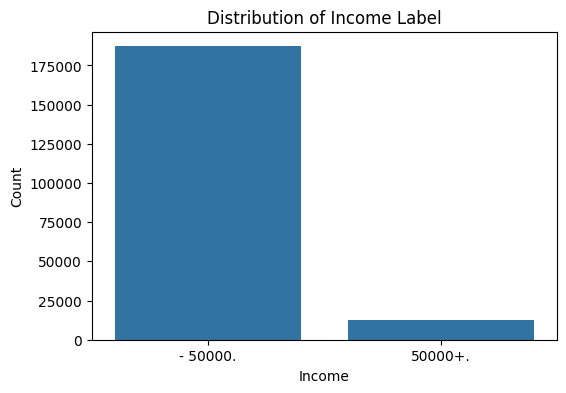


Value counts for original target variable:


label
- 50000.    187141
50000+.      12382
Name: count, dtype: int64

In [ ]:
print("\n Target Variable Analysis")
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Income Label')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

print("\nValue counts for original target variable:")
display(df['label'].value_counts())

Most individuals in the dataset earn less than or equal to 50K, while only a small portion earn more than 50K. This shows the target variable is highly imbalanced, which needs to be considered when building and evaluating models.

In [ ]:
# Explore unique values in object columns to identify potential placeholder values
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values for '{col}':")
    display(df[col].value_counts())


Unique values for 'class of worker':


class of worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: count, dtype: int64


Unique values for 'education':


education
High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: count, dtype: int64


Unique values for 'enroll in edu inst last wk':


enroll in edu inst last wk
Not in universe          186943
High school                6892
College or university      5688
Name: count, dtype: int64


Unique values for 'marital stat':


marital stat
Never married                      86485
Married-civilian spouse present    84222
Divorced                           12710
Widowed                            10463
Separated                           3460
Married-spouse absent               1518
Married-A F spouse present           665
Name: count, dtype: int64


Unique values for 'major industry code':


major industry code
Not in universe or children            100684
Retail trade                            17070
Manufacturing-durable goods              9015
Education                                8283
Manufacturing-nondurable goods           6897
Finance insurance and real estate        6145
Construction                             5984
Business and repair services             5651
Medical except hospital                  4683
Public administration                    4610
Other professional services              4482
Transportation                           4209
Hospital services                        3964
Wholesale trade                          3596
Agriculture                              3023
Personal services except private HH      2937
Social services                          2549
Entertainment                            1651
Communications                           1181
Utilities and sanitary services          1178
Private household services                945
Mining                                    563
Forestry and fisheries                    187
Armed Forces                               36
Name: count, dtype: int64


Unique values for 'major occupation code':


major occupation code
Not in universe                          100684
Adm support including clerical            14837
Professional specialty                    13940
Executive admin and managerial            12495
Other service                             12099
Sales                                     11783
Precision production craft & repair       10518
Machine operators assmblrs & inspctrs      6379
Handlers equip cleaners etc                4127
Transportation and material moving         4020
Farming forestry and fishing               3146
Technicians and related support            3018
Protective services                        1661
Private household services                  780
Armed Forces                                 36
Name: count, dtype: int64


Unique values for 'race':


race
White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: count, dtype: int64


Unique values for 'hispanic origin':


hispanic origin
All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: count, dtype: int64


Unique values for 'sex':


sex
Female    103984
Male       95539
Name: count, dtype: int64


Unique values for 'member of a labor union':


member of a labor union
Not in universe    180459
No                  16034
Yes                  3030
Name: count, dtype: int64


Unique values for 'reason for unemployment':


reason for unemployment
Not in universe          193453
Other job loser            2038
Re-entrant                 2019
Job loser - on layoff       976
Job leaver                  598
New entrant                 439
Name: count, dtype: int64


Unique values for 'full or part time employment stat':


full or part time employment stat
Children or Armed Forces              123769
Full-time schedules                    40736
Not in labor force                     26808
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: count, dtype: int64


Unique values for 'tax filer stat':


tax filer stat
Nonfiler                        75094
Joint both under 65             67383
Single                          37421
Joint both 65+                   8332
Head of household                7426
Joint one under 65 & one 65+     3867
Name: count, dtype: int64


Unique values for 'region of previous residence':


region of previous residence
Not in universe    183750
South                4889
West                 4074
Midwest              3575
Northeast            2705
Abroad                530
Name: count, dtype: int64


Unique values for 'state of previous residence':


state of previous residence
Not in universe         183750
California                1714
Utah                      1063
Florida                    849
North Carolina             812
?                          708
Abroad                     671
Oklahoma                   626
Minnesota                  576
Indiana                    533
North Dakota               499
New Mexico                 463
Michigan                   441
Alaska                     290
Kentucky                   244
Arizona                    243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas                      209
Arkansas                   205
Mississippi                204
Tennessee                  202
Pennsylvania               199
New York                   195
Louisiana                  192
Vermont                    191
Iowa                       189
Illinois                   180
Nebraska                   178
Missouri                   175
Nevada                     174
Maine                      167
Massachusetts              151
Kansas                     149
South Dakota               138
Maryland                   136
Virginia                   126
Connecticut                117
District of Columbia       116
Wisconsin                  105
South Carolina              95
New Jersey                  75
Delaware                    73
Idaho                       31
Name: count, dtype: int64


Unique values for 'detailed household and family stat':


detailed household and family stat
Householder                                        53248
Child <18 never marr not in subfamily              50326
Spouse of householder                              41695
Nonfamily householder                              22213
Child 18+ never marr Not in a subfamily            12030
Secondary individual                                6122
Other Rel 18+ ever marr not in subfamily            1956
Grandchild <18 never marr child of subfamily RP     1868
Other Rel 18+ never marr not in subfamily           1728
Grandchild <18 never marr not in subfamily          1066
Child 18+ ever marr Not in a subfamily              1013
Child under 18 of RP of unrel subfamily              732
RP of unrelated subfamily                            685
Child 18+ ever marr RP of subfamily                  671
Other Rel <18 never marr child of subfamily RP       656
Other Rel 18+ ever marr RP of subfamily              656
Other Rel 18+ spouse of subfamily RP                 638
Child 18+ never marr RP of subfamily                 589
Other Rel <18 never marr not in subfamily            584
Grandchild 18+ never marr not in subfamily           375
In group quarters                                    196
Child 18+ spouse of subfamily RP                     126
Other Rel 18+ never marr RP of subfamily              94
Child <18 never marr RP of subfamily                  80
Spouse of RP of unrelated subfamily                   52
Child <18 ever marr not in subfamily                  36
Grandchild 18+ ever marr not in subfamily             34
Grandchild 18+ spouse of subfamily RP                 10
Child <18 ever marr RP of subfamily                    9
Grandchild 18+ ever marr RP of subfamily               9
Grandchild 18+ never marr RP of subfamily              6
Other Rel <18 ever marr RP of subfamily                6
Other Rel <18 never married RP of subfamily            4
Other Rel <18 spouse of subfamily RP                   3
Child <18 spouse of subfamily RP                       2
Grandchild <18 never marr RP of subfamily              2
Grandchild <18 ever marr not in subfamily              2
Other Rel <18 ever marr not in subfamily               1
Name: count, dtype: int64


Unique values for 'detailed household summary in household':


detailed household summary in household
Householder                             75475
Child under 18 never married            50426
Spouse of householder                   41709
Child 18 or older                       14430
Other relative of householder            9703
Nonrelative of householder               7601
Group Quarters- Secondary individual      132
Child under 18 ever married                47
Name: count, dtype: int64


Unique values for 'migration code-change in msa':


migration code-change in msa
?                   99696
Nonmover            82538
MSA to MSA          10601
NonMSA to nonMSA     2811
Not in universe      1516
MSA to nonMSA         790
NonMSA to MSA         615
Abroad to MSA         453
Not identifiable      430
Abroad to nonMSA       73
Name: count, dtype: int64


Unique values for 'migration code-change in reg':


migration code-change in reg
?                                 99696
Nonmover                          82538
Same county                        9812
Different county same state        2797
Not in universe                    1516
Different region                   1178
Different state same division       991
Abroad                              530
Different division same region      465
Name: count, dtype: int64


Unique values for 'migration code-move within reg':


migration code-move within reg
?                               99696
Nonmover                        82538
Same county                      9812
Different county same state      2797
Not in universe                  1516
Different state in South          973
Different state in West           679
Different state in Midwest        551
Abroad                            530
Different state in Northeast      431
Name: count, dtype: int64


Unique values for 'live in this house 1 year ago':


live in this house 1 year ago
Not in universe under 1 year old    101212
Yes                                  82538
No                                   15773
Name: count, dtype: int64


Unique values for 'migration prev res in sunbelt':


migration prev res in sunbelt
?                  99696
Not in universe    84054
No                  9987
Yes                 5786
Name: count, dtype: int64


Unique values for 'family members under 18':


family members under 18
Not in universe           144232
Both parents present       38983
Mother only present        12772
Father only present         1883
Neither parent present      1653
Name: count, dtype: int64


Unique values for 'country of birth father':


country of birth father
United-States                   159163
Mexico                           10008
?                                 6713
Puerto-Rico                       2680
Italy                             2212
Canada                            1380
Germany                           1356
Dominican-Republic                1290
Poland                            1212
Philippines                       1154
Cuba                              1125
El-Salvador                        982
China                              856
England                            793
Columbia                           614
India                              580
South Korea                        530
Ireland                            508
Jamaica                            463
Vietnam                            457
Guatemala                          445
Japan                              392
Portugal                           388
Ecuador                            379
Haiti                              351
Greece                             344
Peru                               335
Nicaragua                          315
Hungary                            306
Scotland                           247
Iran                               233
Yugoslavia                         217
Taiwan                             199
Cambodia                           196
Honduras                           194
France                             191
Outlying-U S (Guam USVI etc)       159
Laos                               154
Trinadad&Tobago                    113
Thailand                           107
Hong Kong                          106
Holand-Netherlands                  51
Panama                              25
Name: count, dtype: int64


Unique values for 'country of birth mother':


country of birth mother
United-States                   160479
Mexico                            9781
?                                 6119
Puerto-Rico                       2473
Italy                             1844
Canada                            1451
Germany                           1382
Philippines                       1231
Poland                            1110
Cuba                              1108
El-Salvador                       1108
Dominican-Republic                1103
England                            903
China                              760
Columbia                           612
South Korea                        609
Ireland                            599
India                              581
Vietnam                            473
Japan                              469
Jamaica                            453
Guatemala                          444
Ecuador                            375
Peru                               355
Haiti                              353
Portugal                           342
Nicaragua                          301
Hungary                            297
Greece                             261
Scotland                           241
Taiwan                             222
Honduras                           218
France                             212
Iran                               198
Yugoslavia                         177
Cambodia                           157
Outlying-U S (Guam USVI etc)       157
Laos                               155
Thailand                           123
Hong Kong                          107
Trinadad&Tobago                     99
Holand-Netherlands                  49
Panama                              32
Name: count, dtype: int64


Unique values for 'country of birth self':


country of birth self
United-States                   176989
Mexico                            5767
?                                 3393
Puerto-Rico                       1400
Germany                            851
Philippines                        845
Cuba                               837
Canada                             700
Dominican-Republic                 690
El-Salvador                        689
China                              478
South Korea                        471
England                            457
Columbia                           434
Italy                              419
India                              408
Vietnam                            391
Poland                             381
Guatemala                          344
Japan                              339
Jamaica                            320
Peru                               268
Ecuador                            258
Haiti                              228
Nicaragua                          218
Taiwan                             201
Portugal                           174
Iran                               157
Greece                             147
Honduras                           144
Ireland                            135
France                             121
Outlying-U S (Guam USVI etc)       119
Thailand                           113
Laos                               105
Hong Kong                          100
Cambodia                            95
Hungary                             79
Scotland                            75
Trinadad&Tobago                     66
Yugoslavia                          66
Panama                              28
Holand-Netherlands                  23
Name: count, dtype: int64


Unique values for 'citizenship':


citizenship
Native- Born in the United States              176992
Foreign born- Not a citizen of U S              13401
Foreign born- U S citizen by naturalization      5855
Native- Born abroad of American Parent(s)        1756
Native- Born in Puerto Rico or U S Outlying      1519
Name: count, dtype: int64


Unique values for 'fill inc questionnaire for veteran's admin':


fill inc questionnaire for veteran's admin
Not in universe    197539
No                   1593
Yes                   391
Name: count, dtype: int64


Unique values for 'label':


label
- 50000.    187141
50000+.      12382
Name: count, dtype: int64

Several categorical columns contain placeholder values such as ? or Not in universe, which represent missing or inapplicable data and need consistent treatment. Education levels are diverse and clearly ordered, which will be useful for modeling. Some categories like race or sex are well balanced, but others (e.g., citizenship, labor union membership) are heavily skewed. These issues highlight the need for careful encoding and possibly grouping rare categories.

#### Visualize categorical features vs. target
Create count plots for each object type column to visualize the distribution of the target variable within each category.

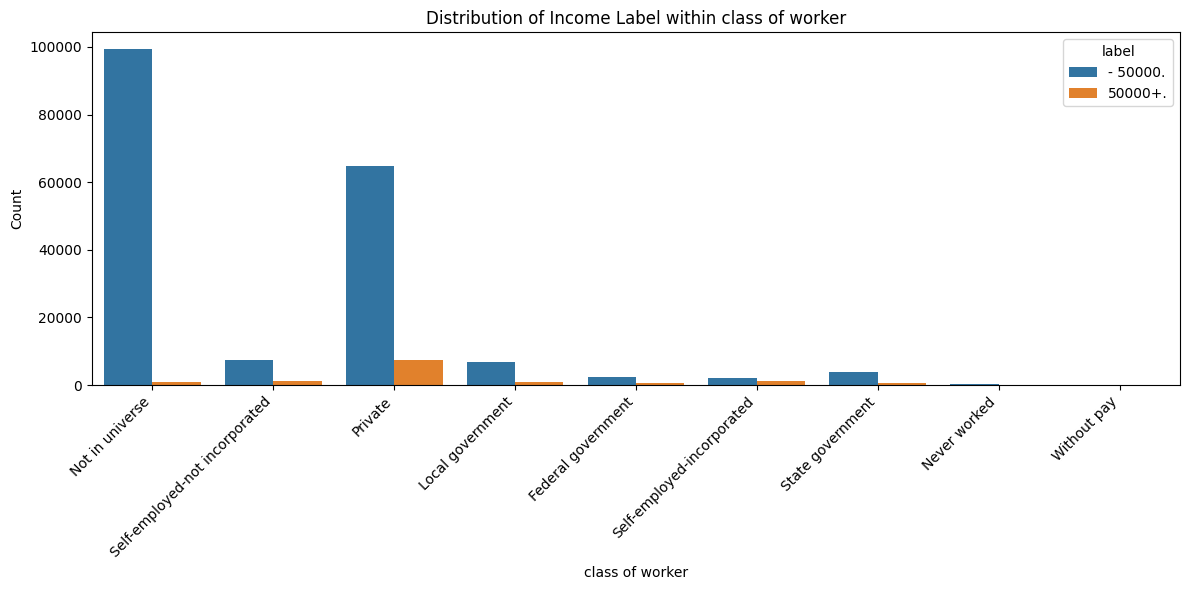

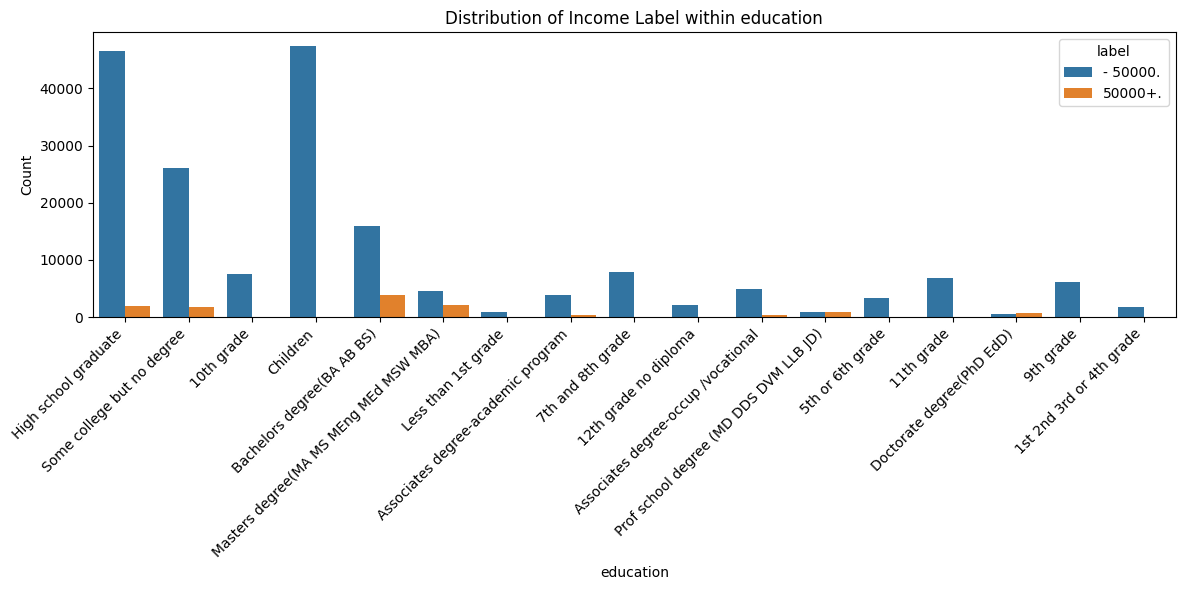

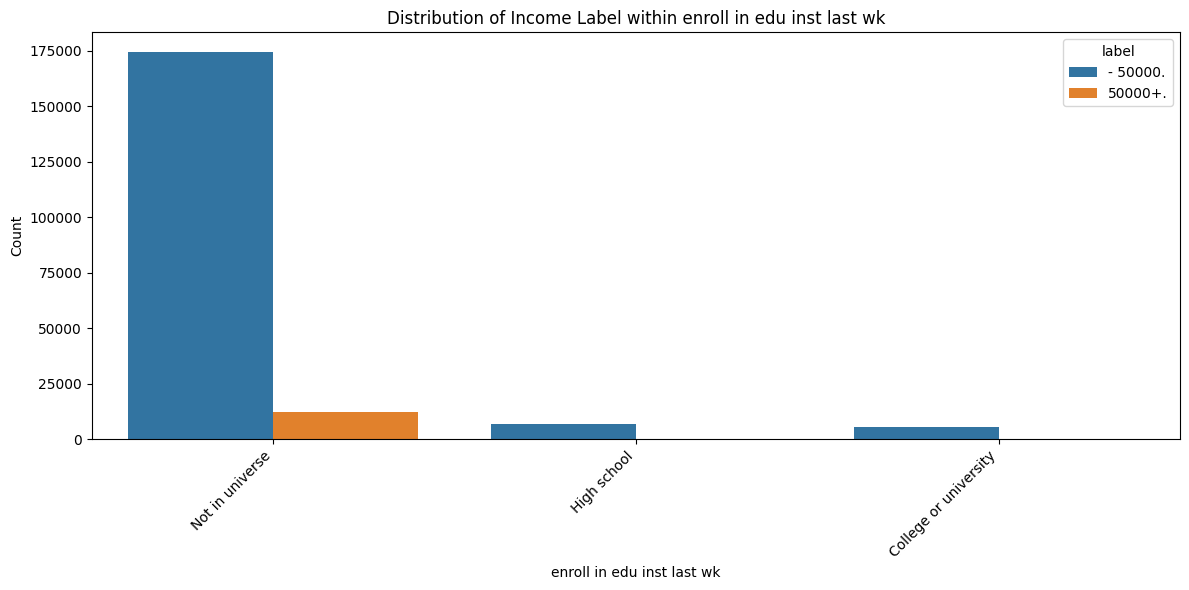

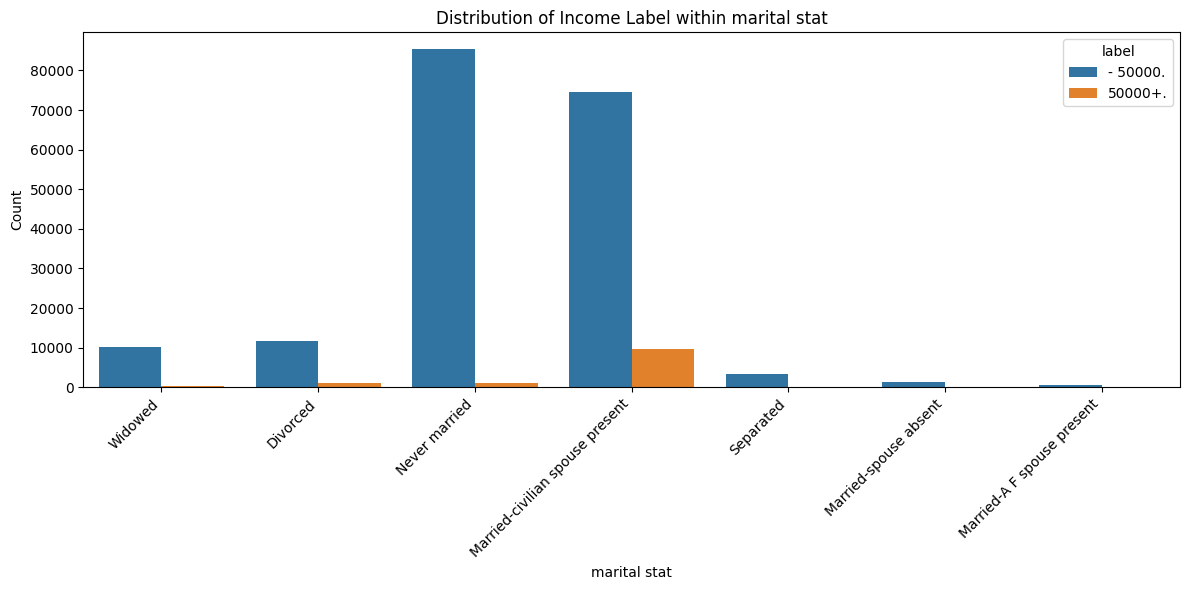

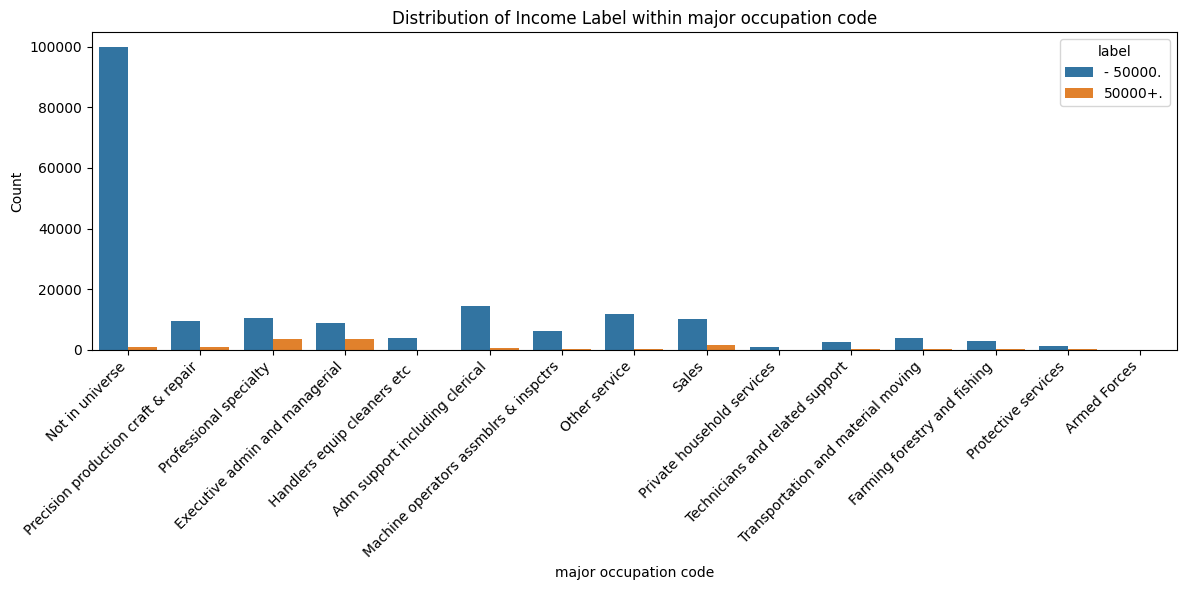

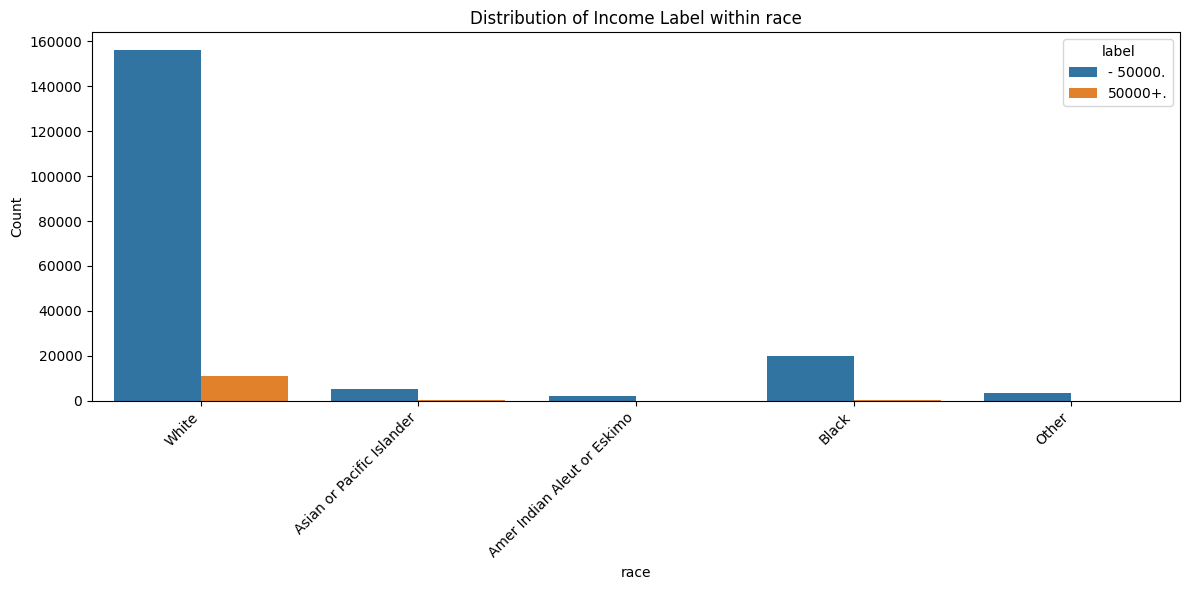

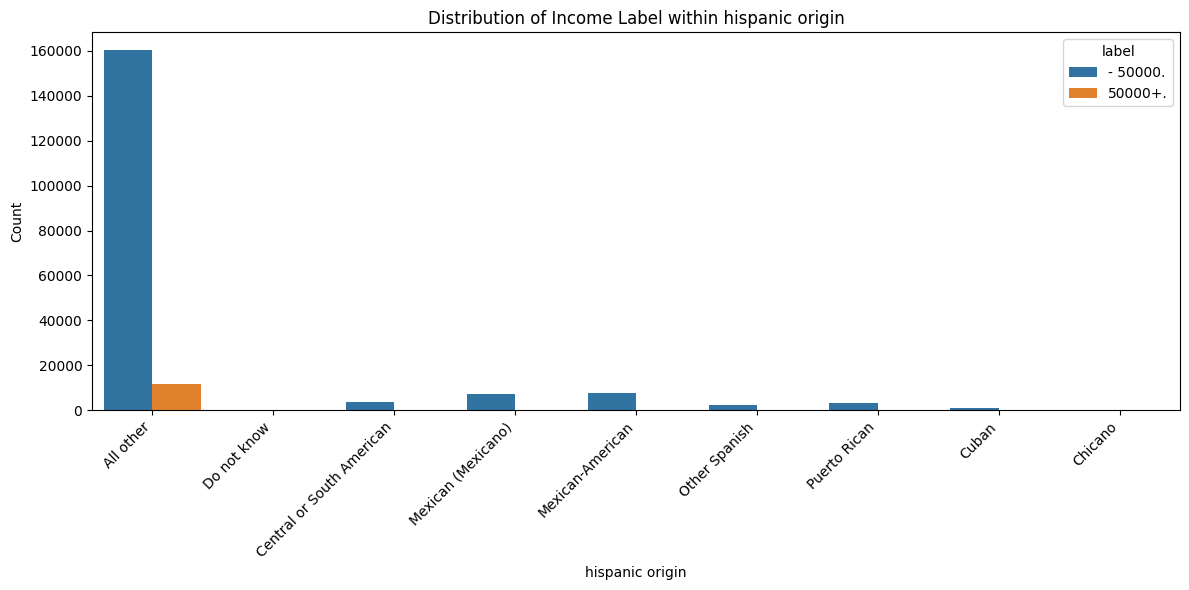

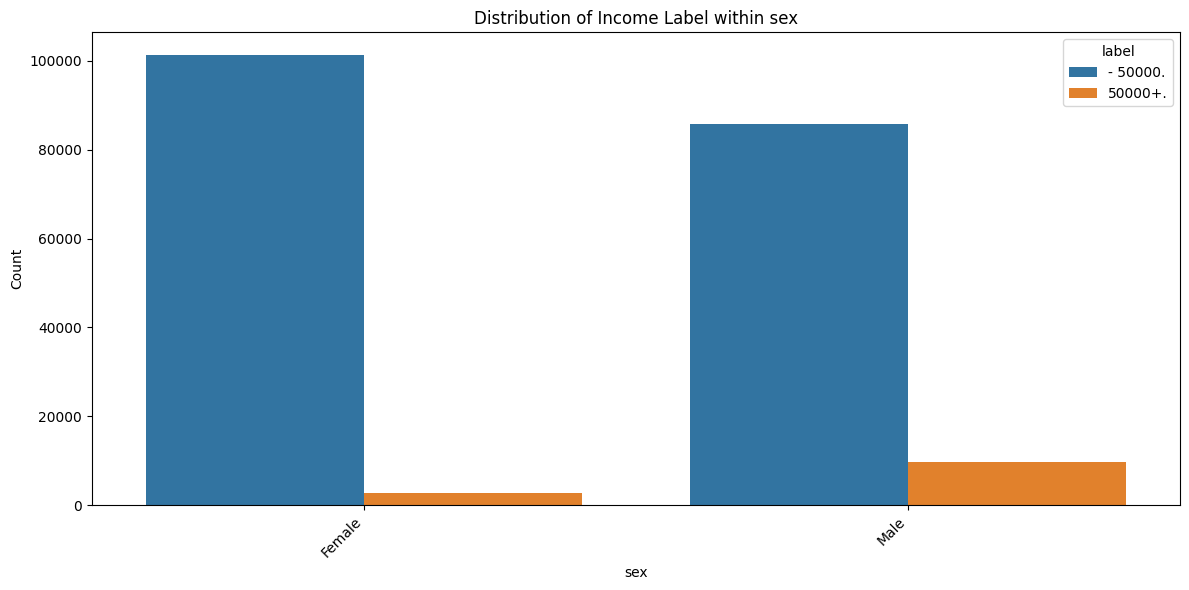

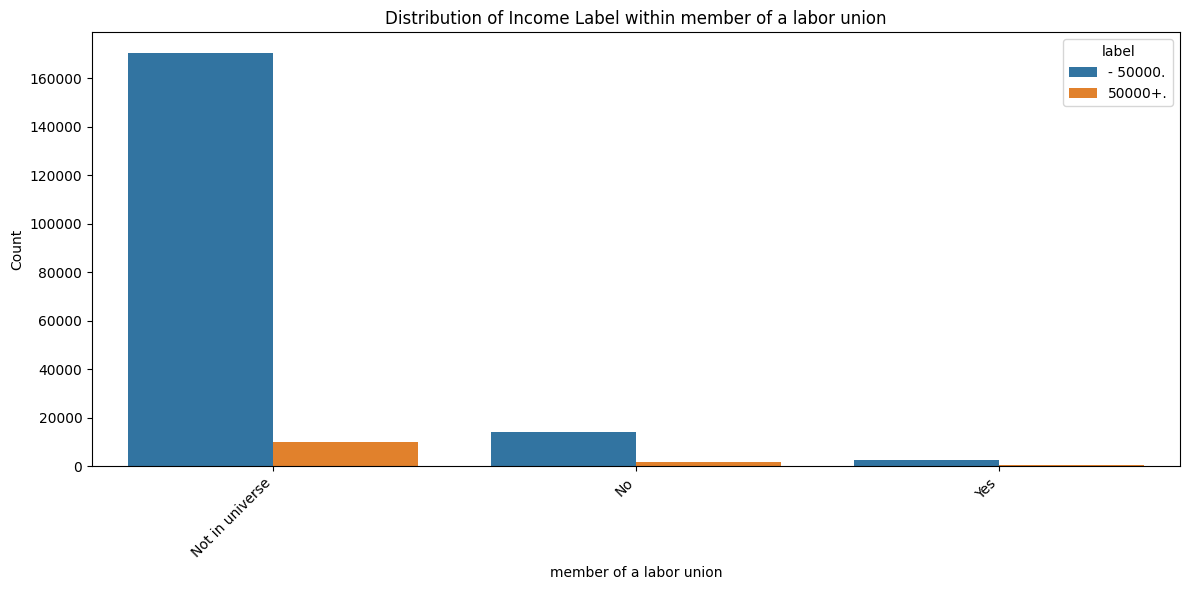

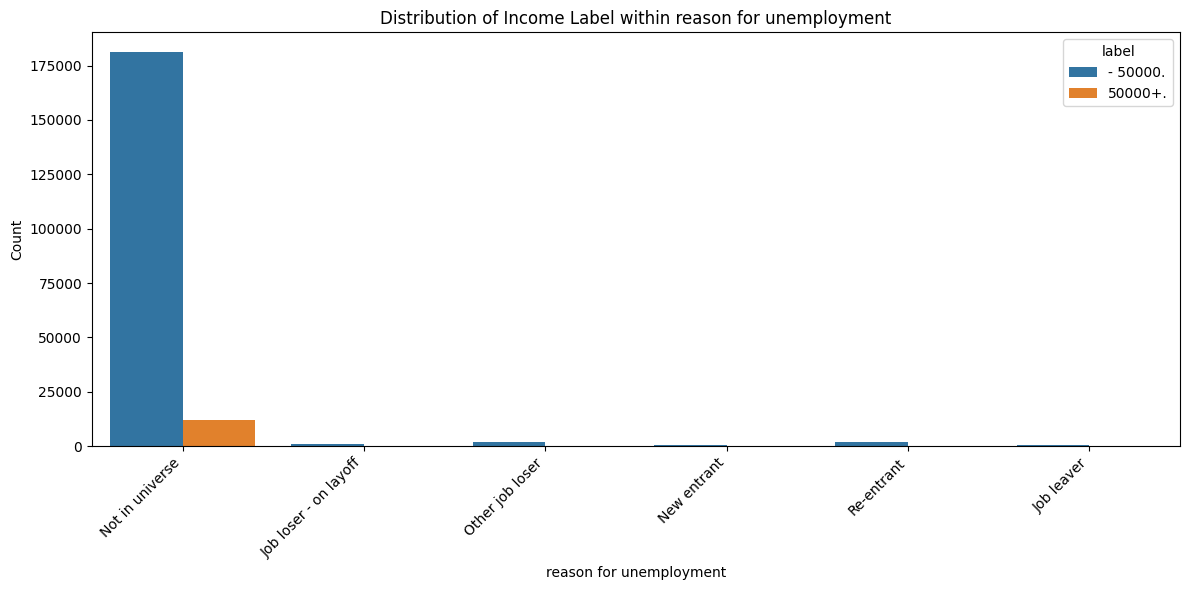

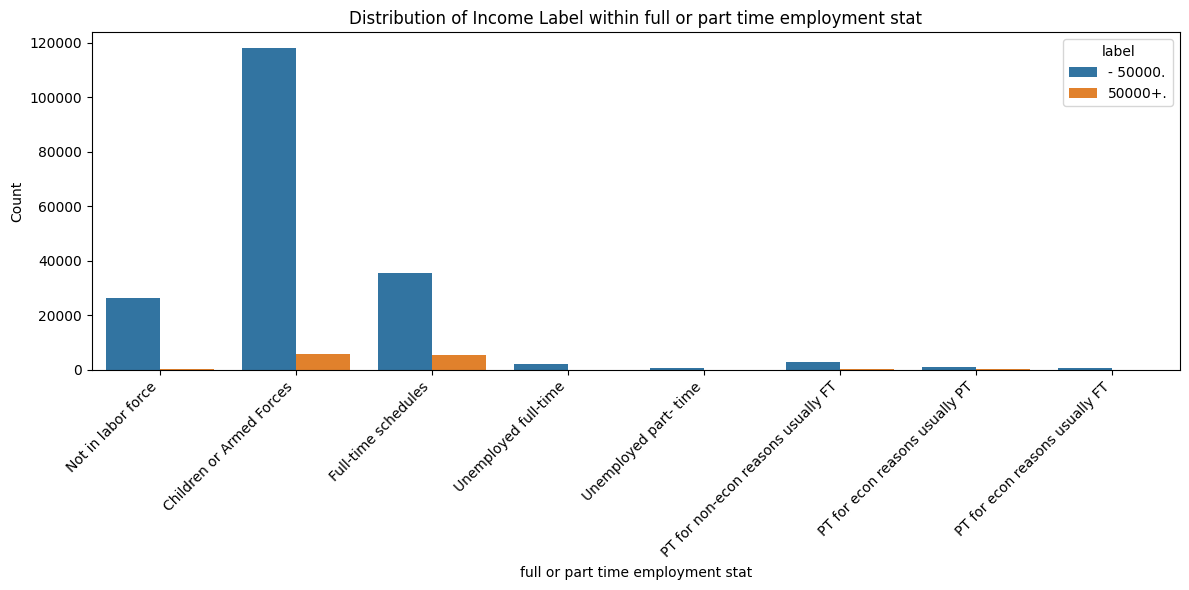

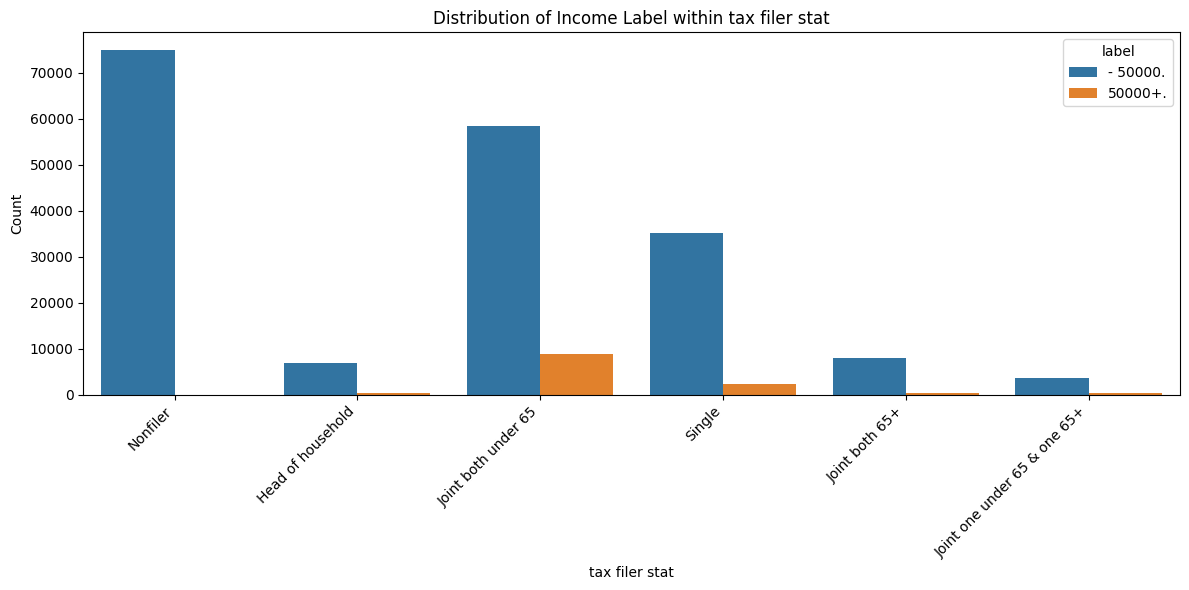

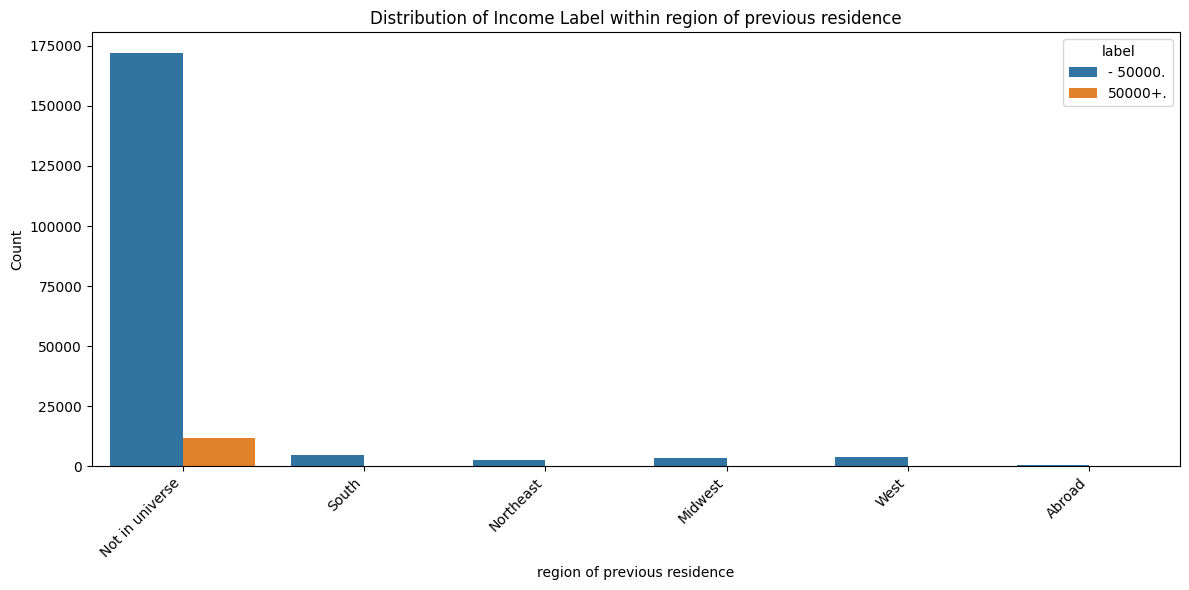

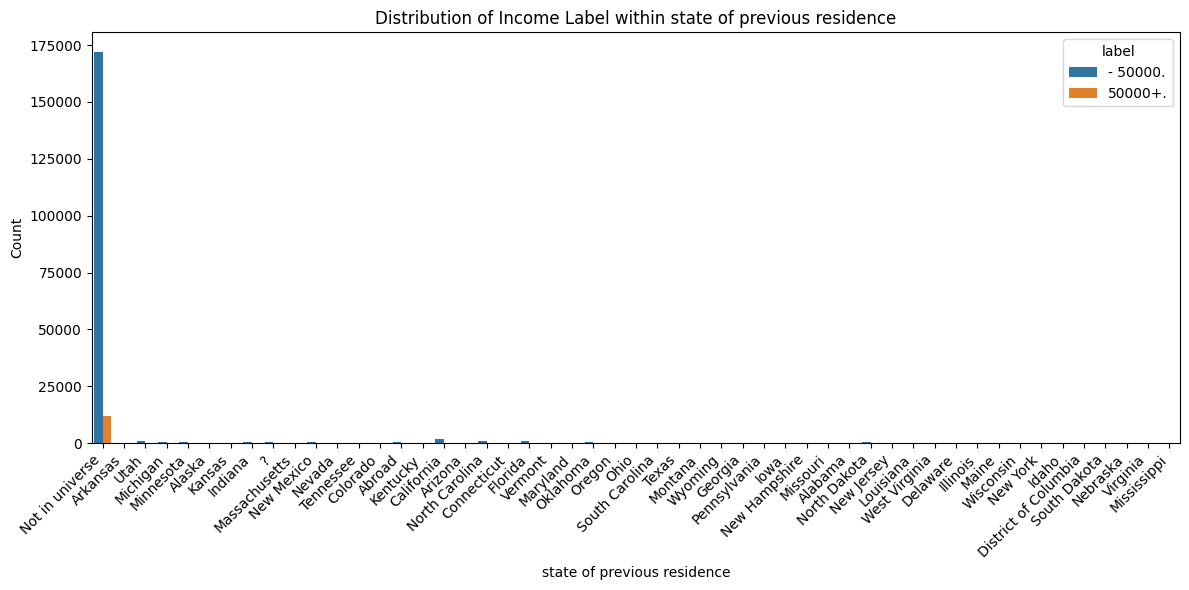

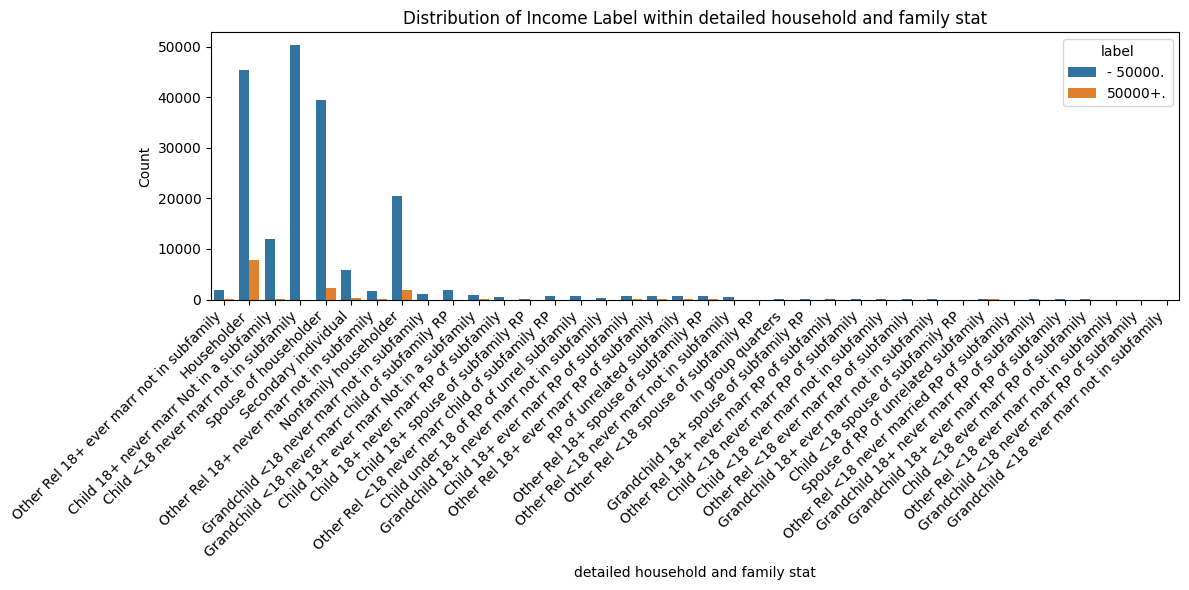

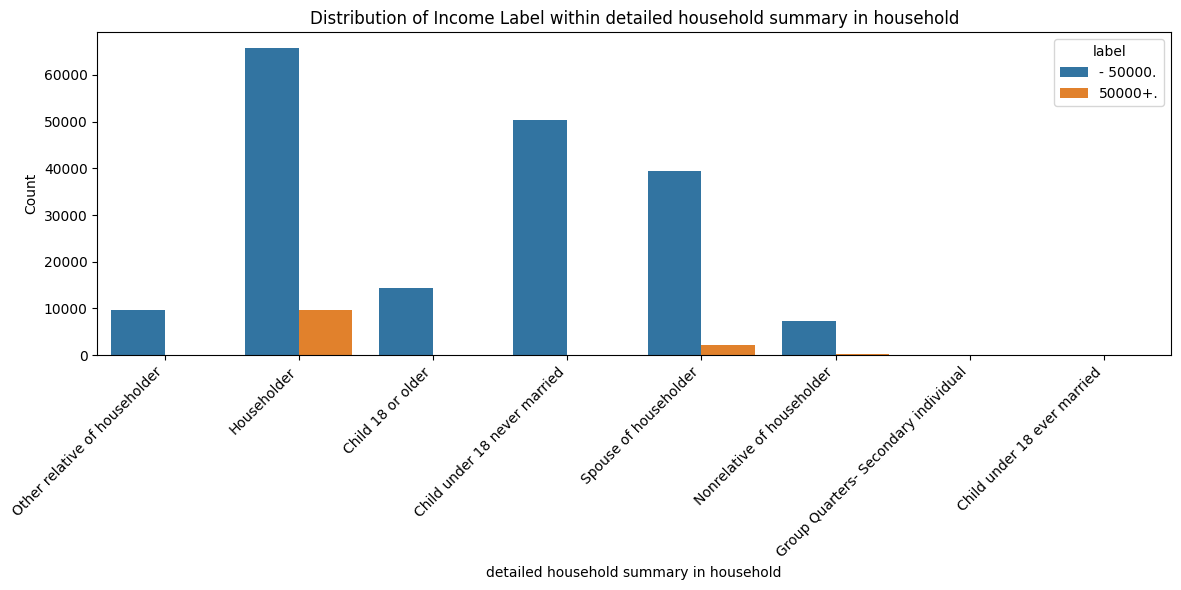

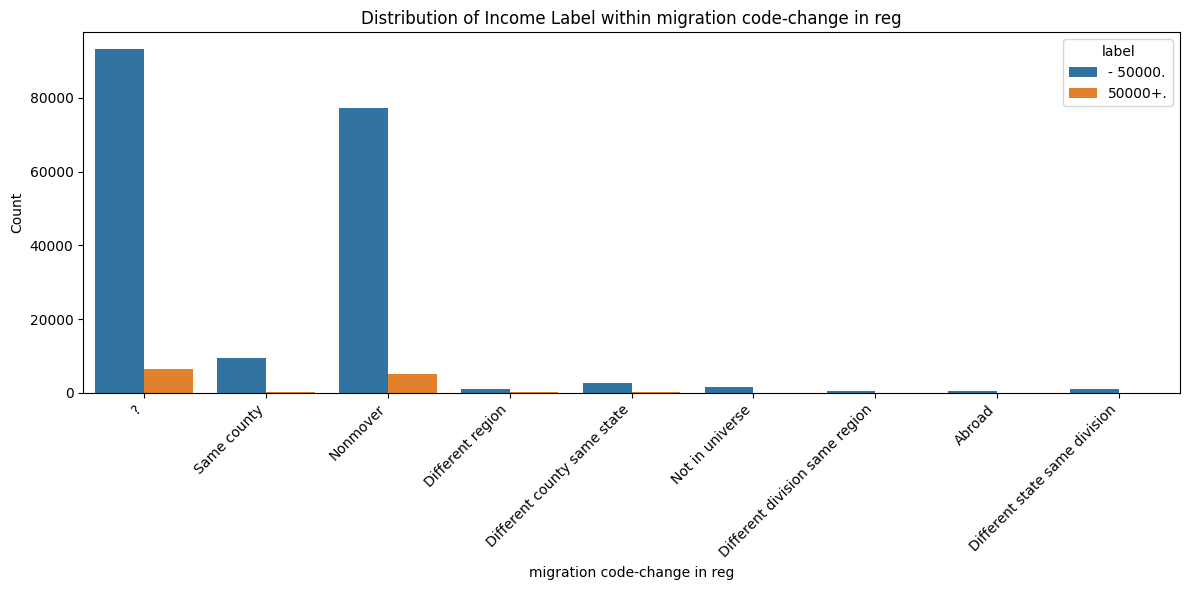

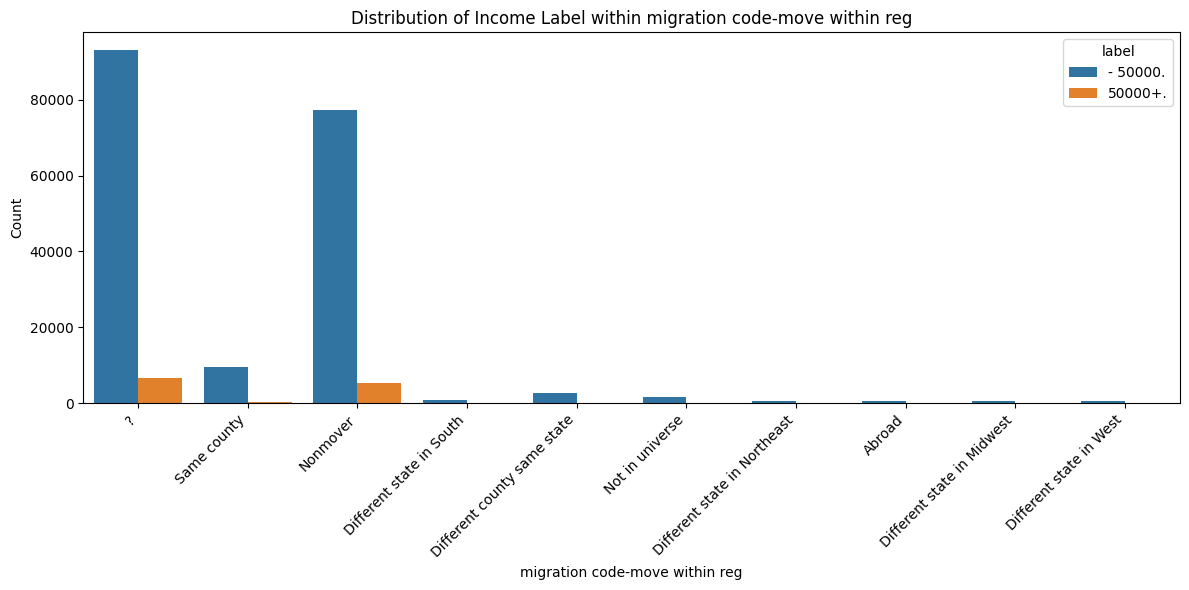

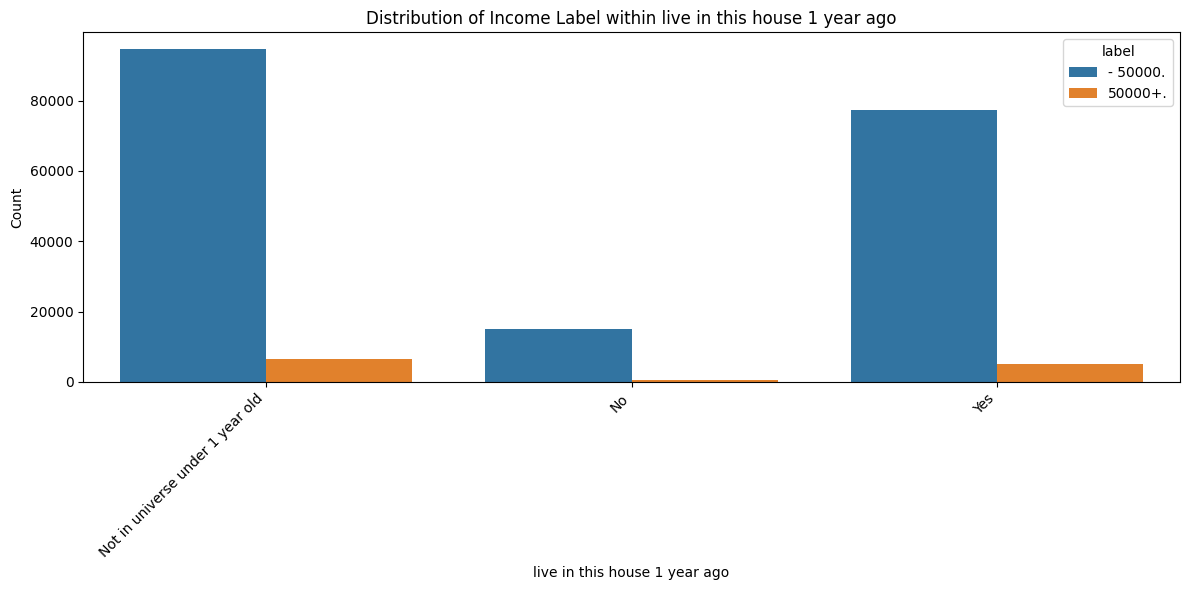

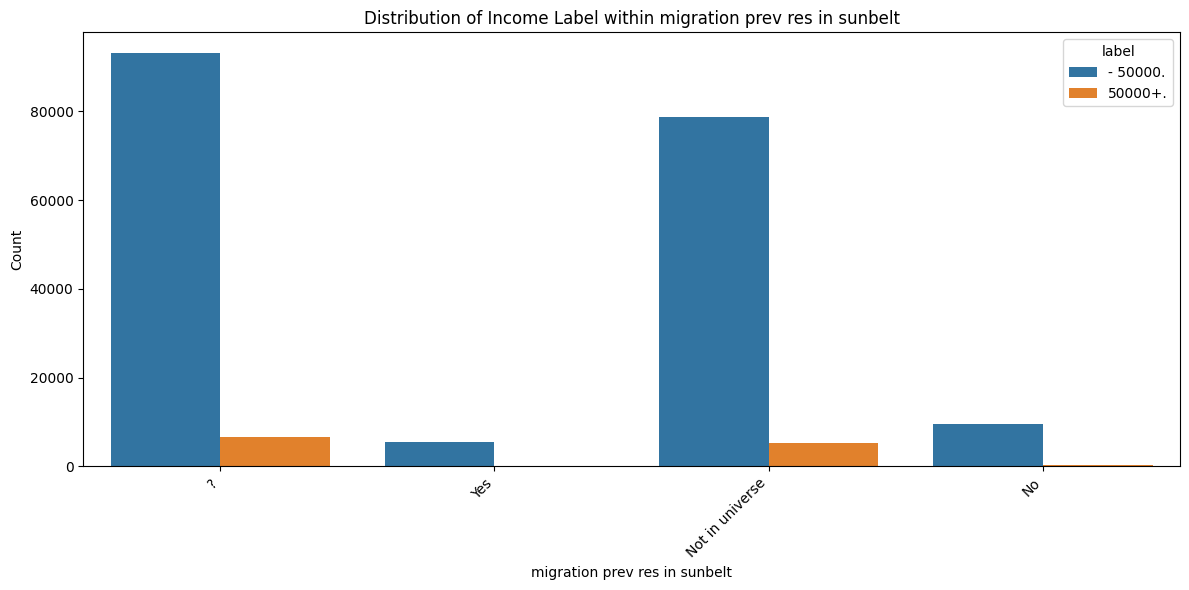

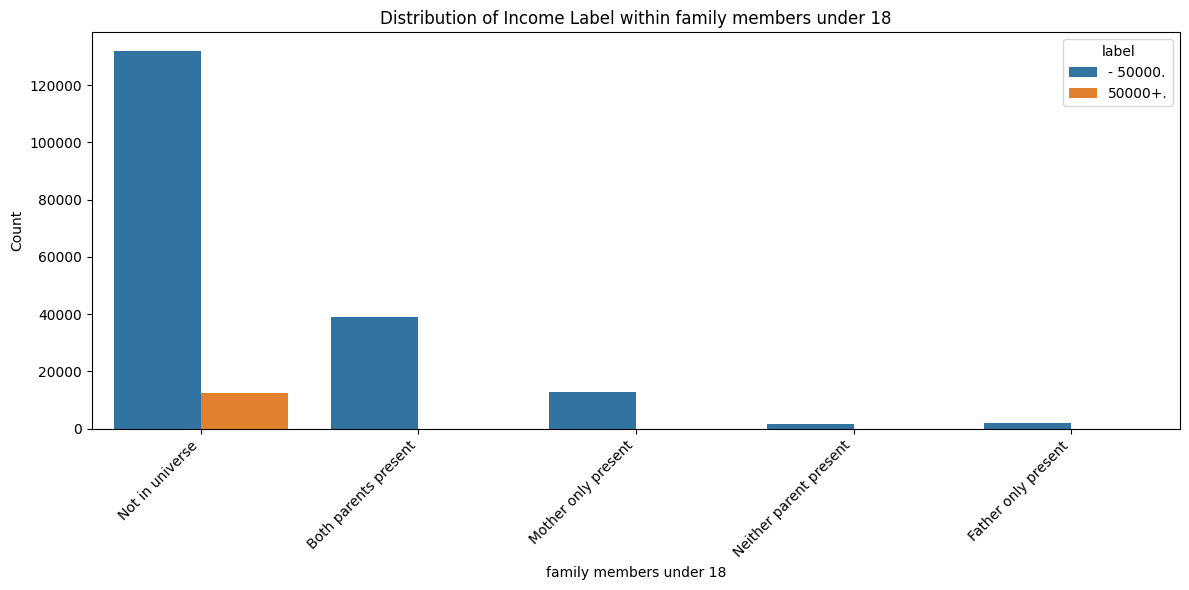

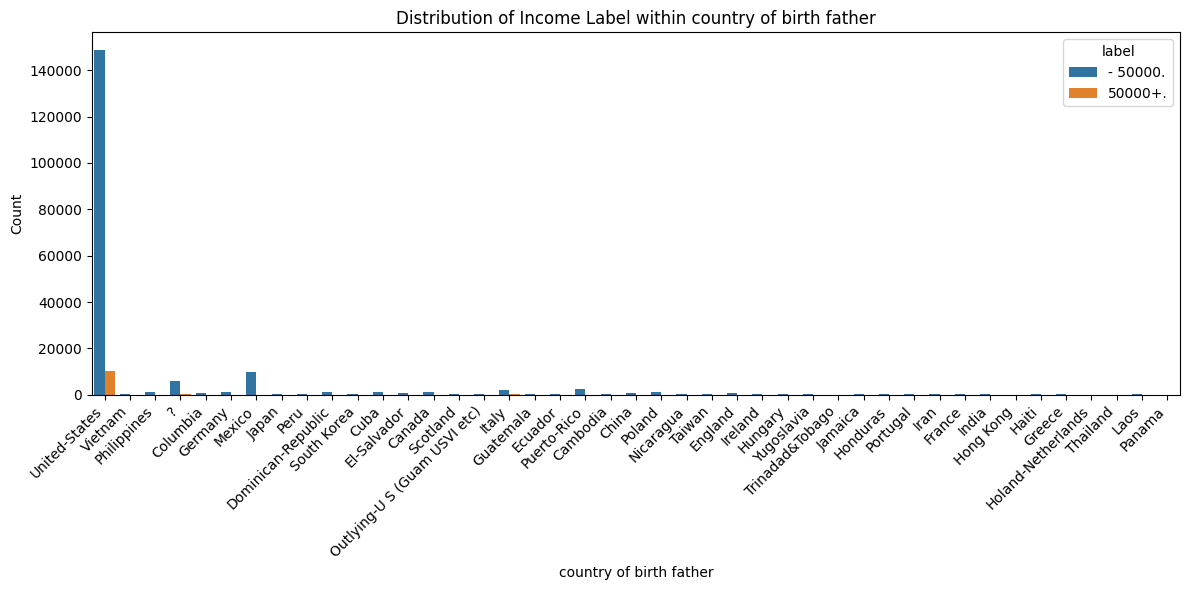

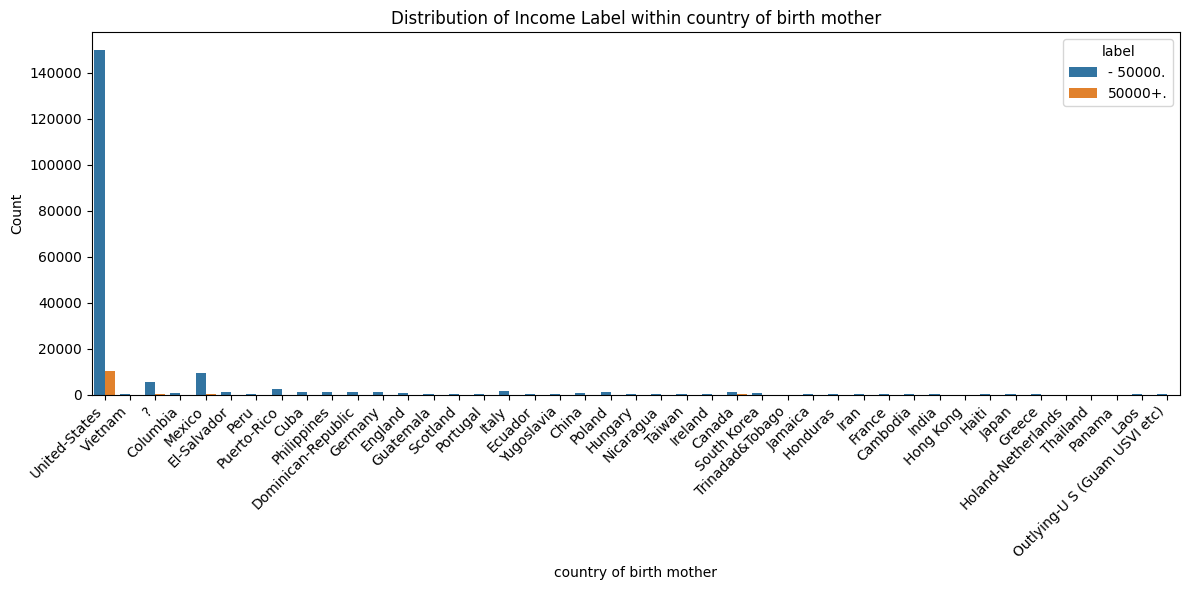

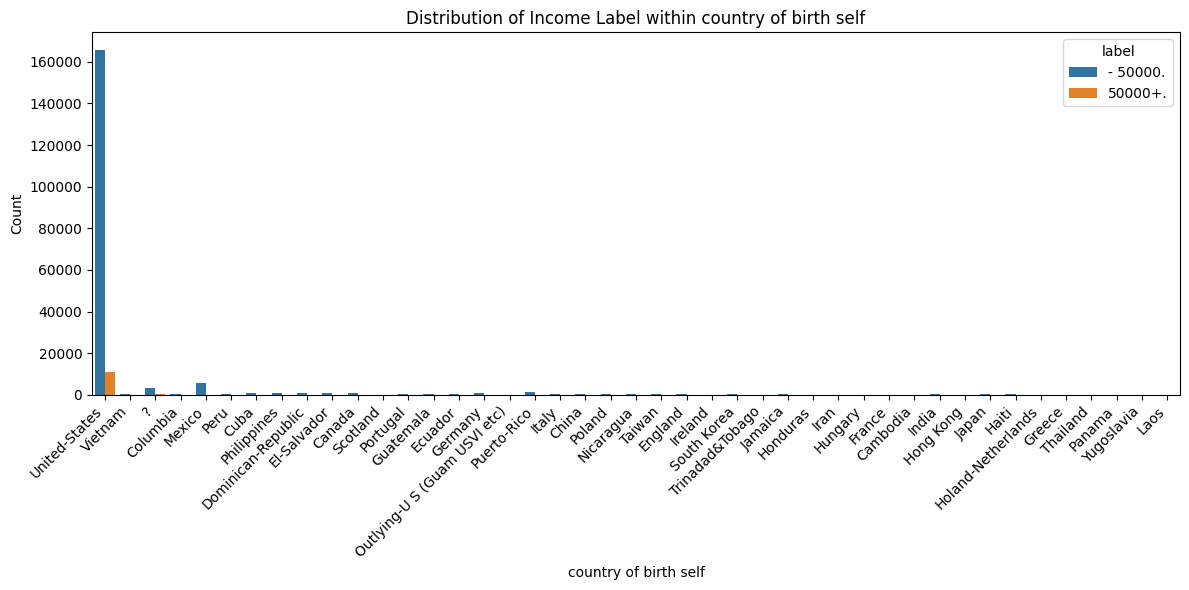

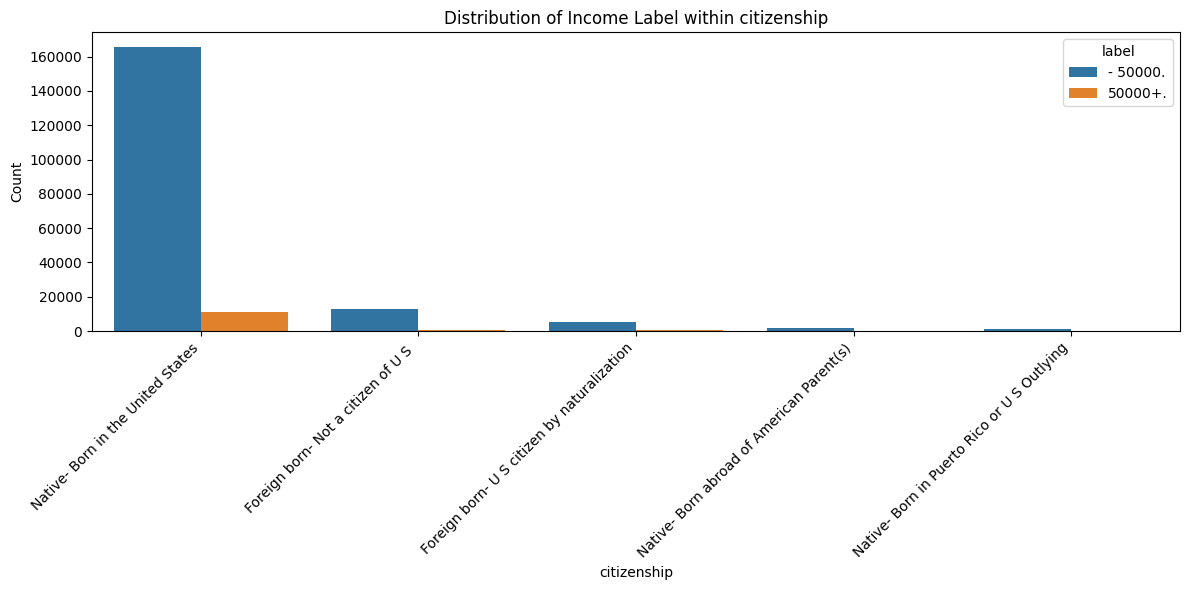

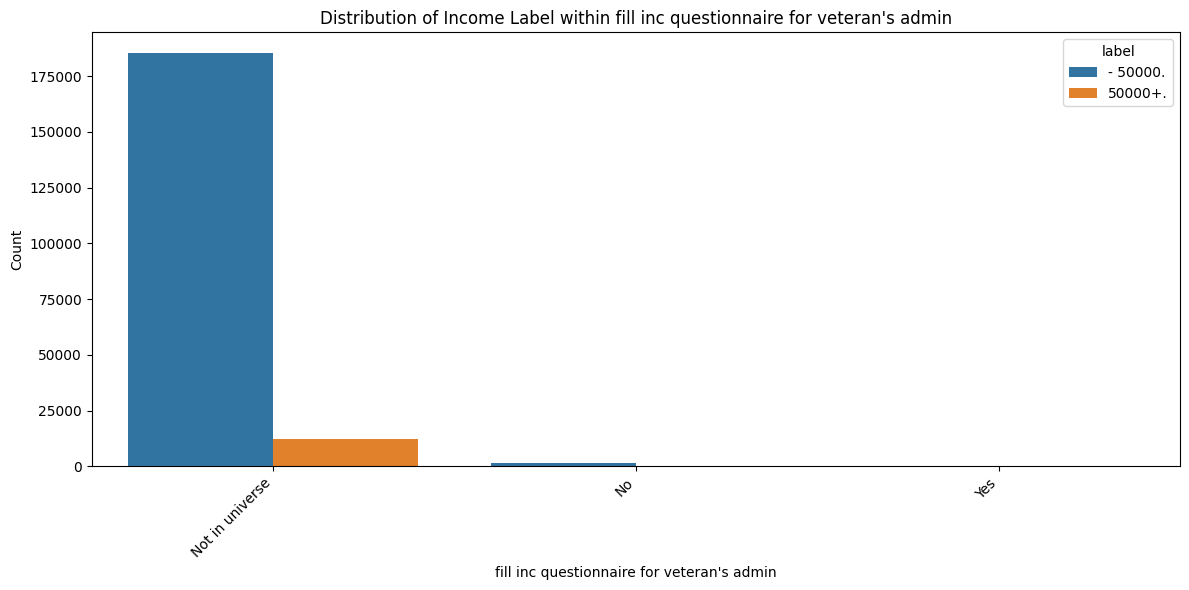

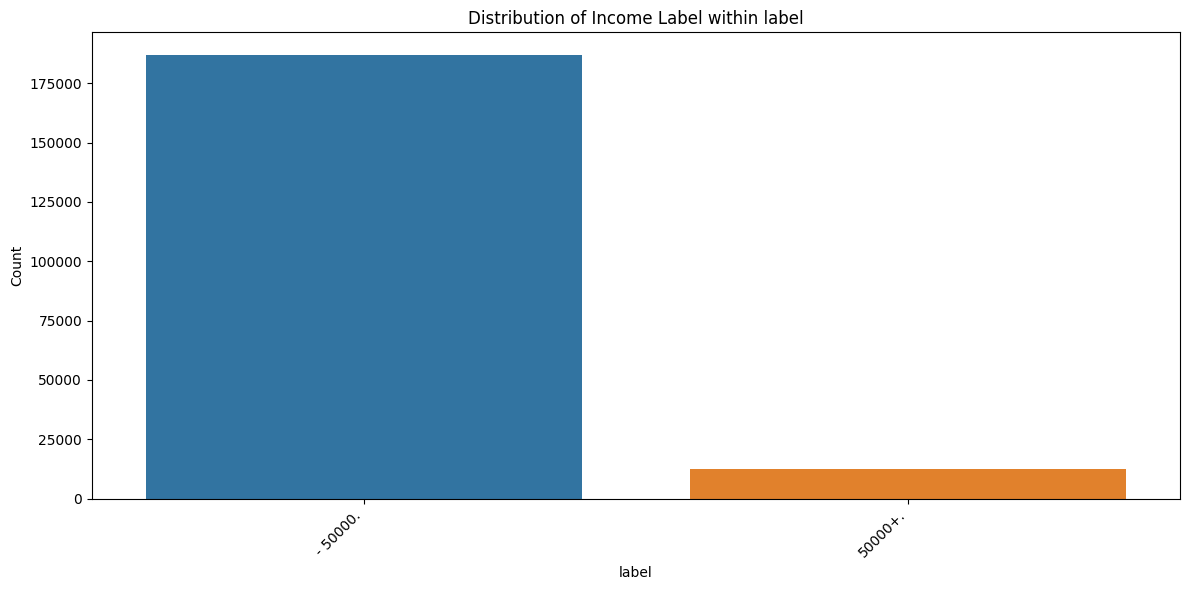

In [ ]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='label', data=df)
    plt.title(f'Distribution of Income Label within {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Most workers fall into the “Not in universe” and “Private” categories, with “Private” employees showing a higher share of >50K earners, while “Not in universe” is almost entirely ≤50K. Education shows a clear upward trend, as Bachelor’s degree and higher are strongly linked to higher income. Males are more likely than females to be in the >50K group. Full-time schedules stand out as a strong driver of higher earnings, in contrast to non-labor or children categories. Country of birth and citizenship are dominated by U.S. origins, but variations exist across groups, and the presence of “?” values indicates missing or unclear data that require cleaning.

#### Visualize numerical feature distributions

Identify the numerical columns and create histograms for each to visualize their distributions.

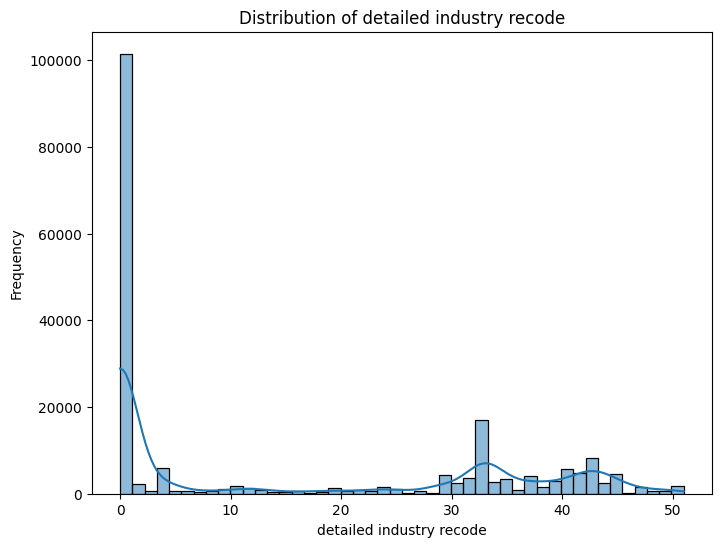

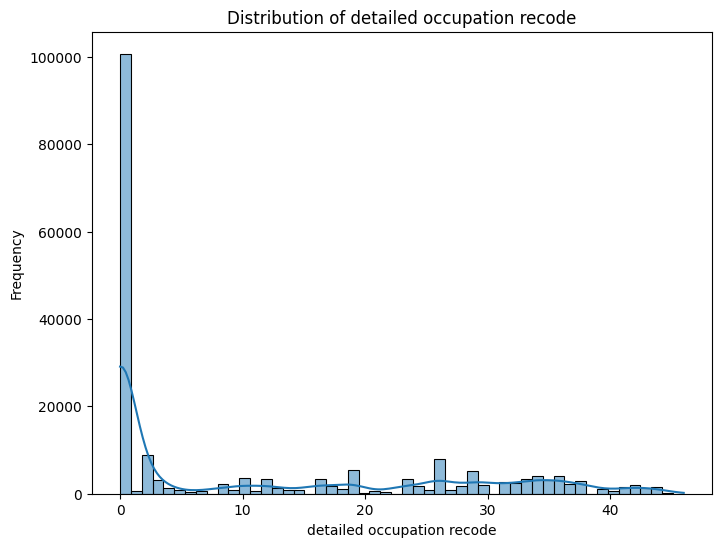

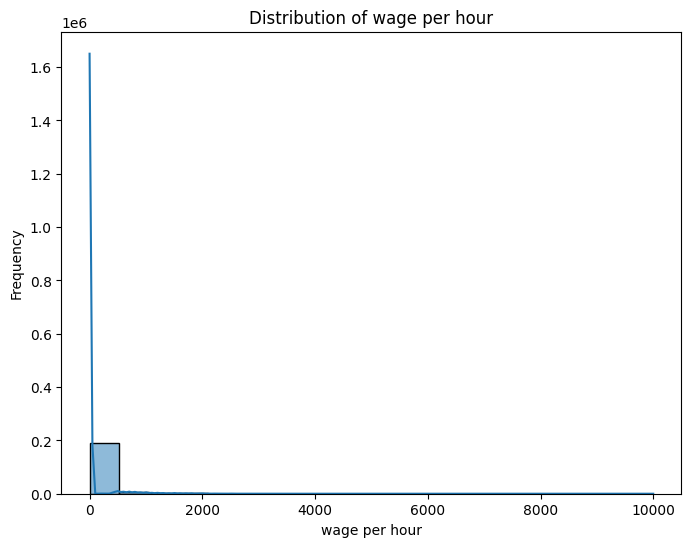

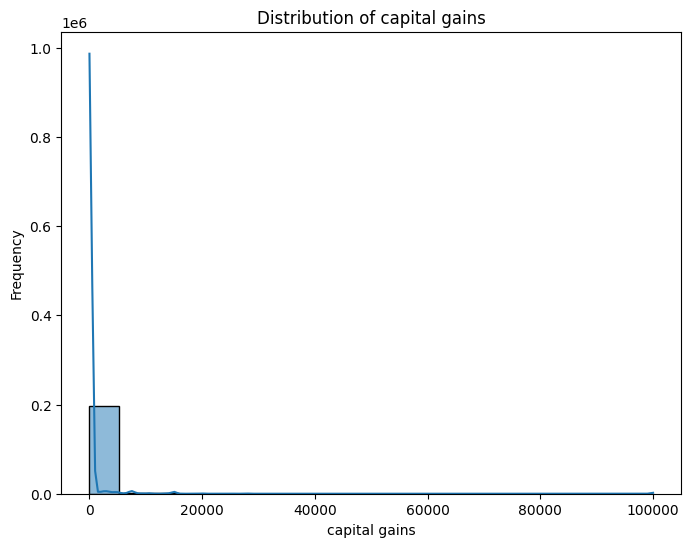

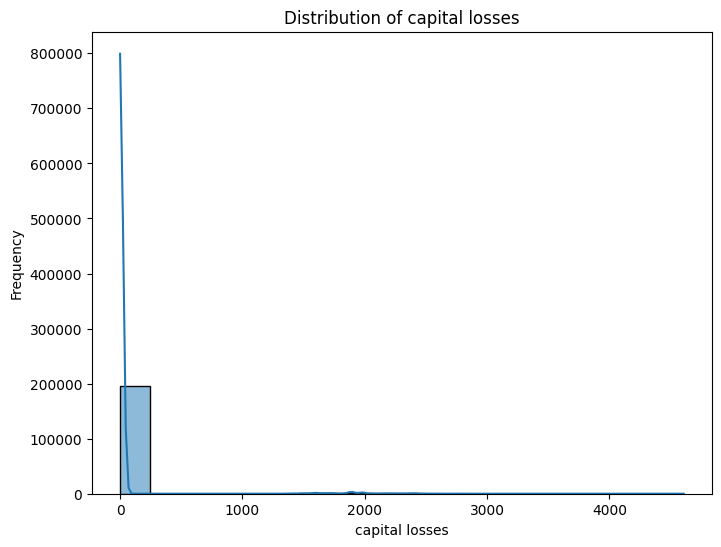

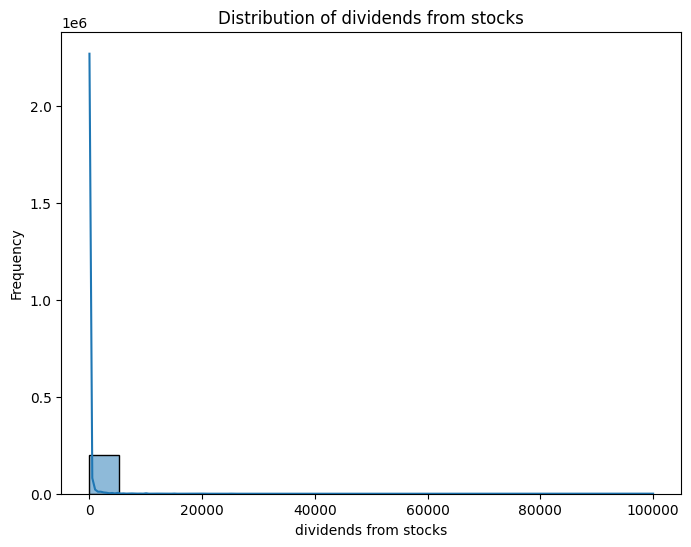

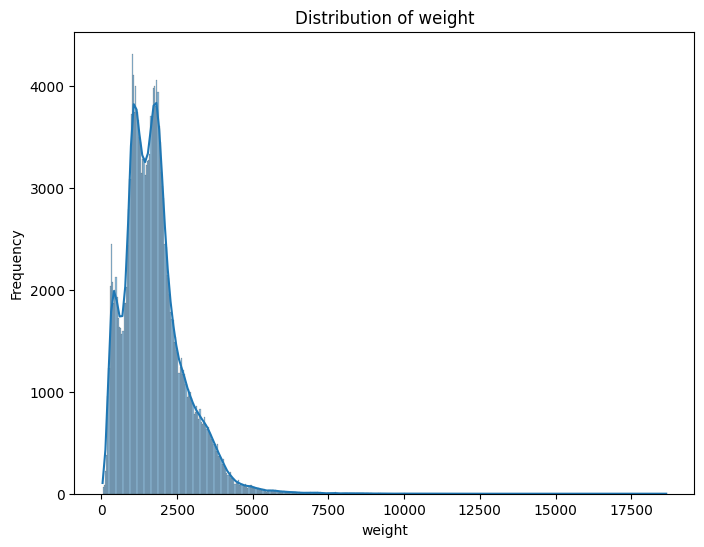

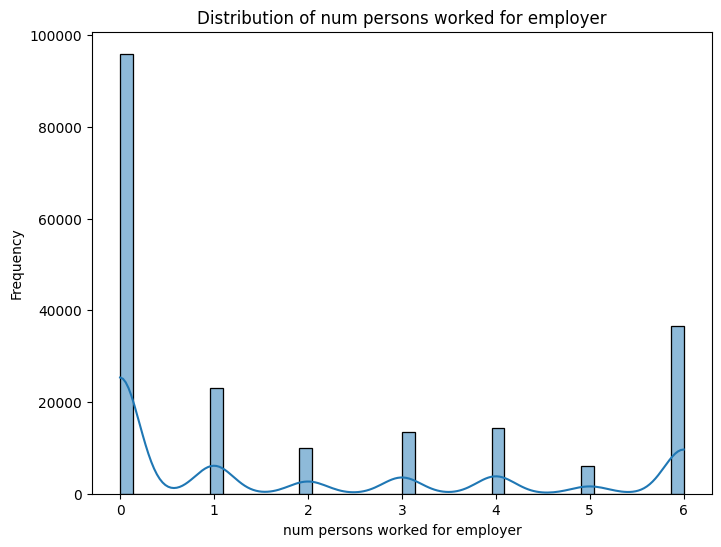

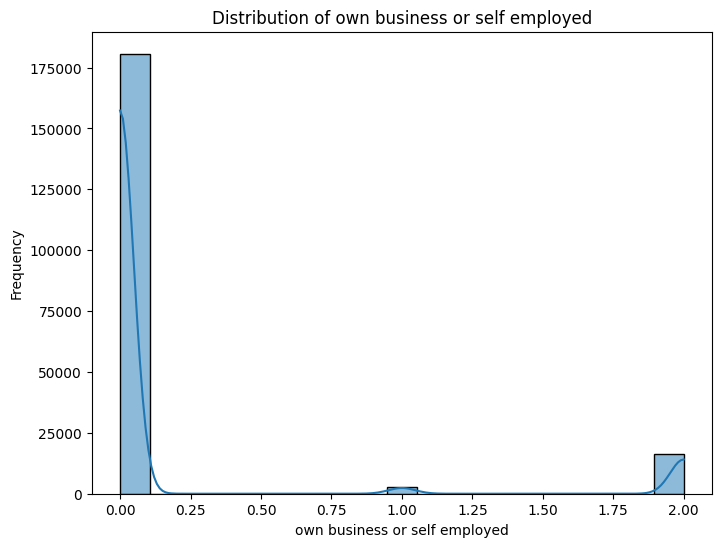

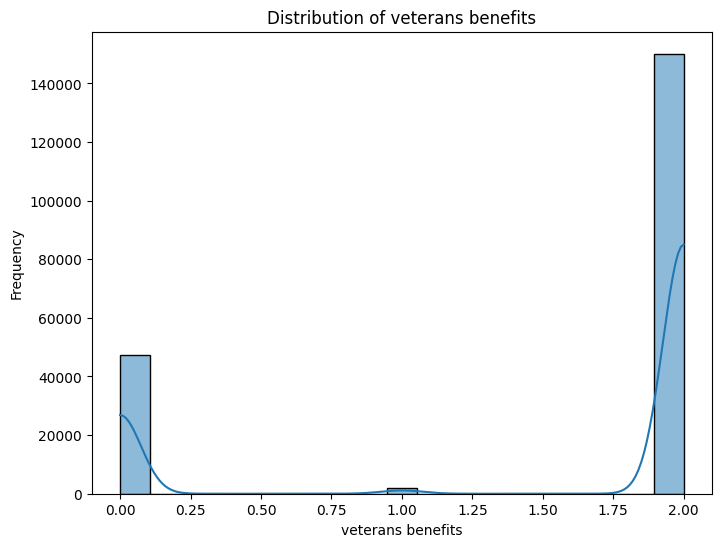

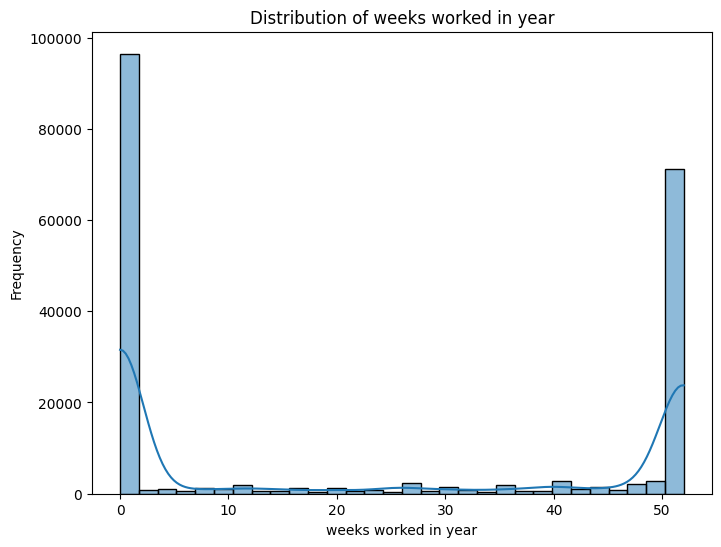

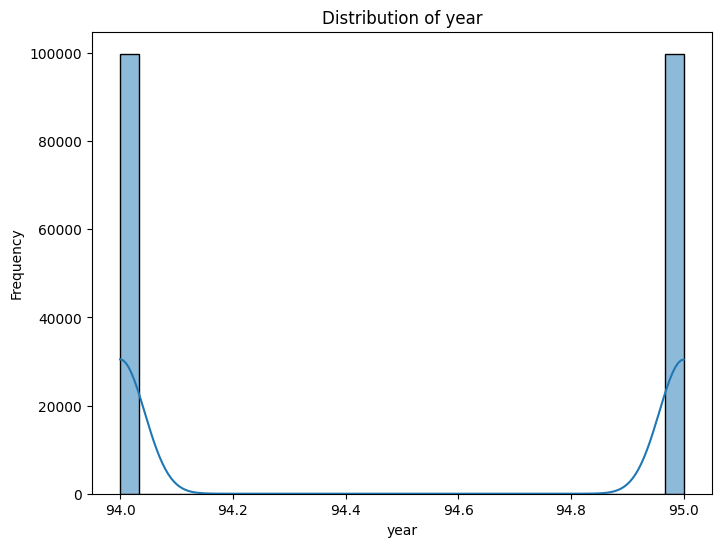

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The age distribution reflects both children and working-age adults, while income-related variables such as wage per hour, capital gains, capital losses, and dividends are highly skewed with many zeros and long right tails. Several employment-related numeric fields, including detailed industry and occupation recodes, number of persons worked for employer, veterans benefits, and weeks worked in year, show discrete peaks, suggesting categorical or ordinal characteristics rather than continuous ones. The weight variable appears smoother and more continuous. Overall, many numerical features display heavy skewness or discrete structures that require careful handling in modeling.

#### Visualize numerical features vs. target
Select numerical columns and create box plots to visualize the relationship between numerical features and the target variable.

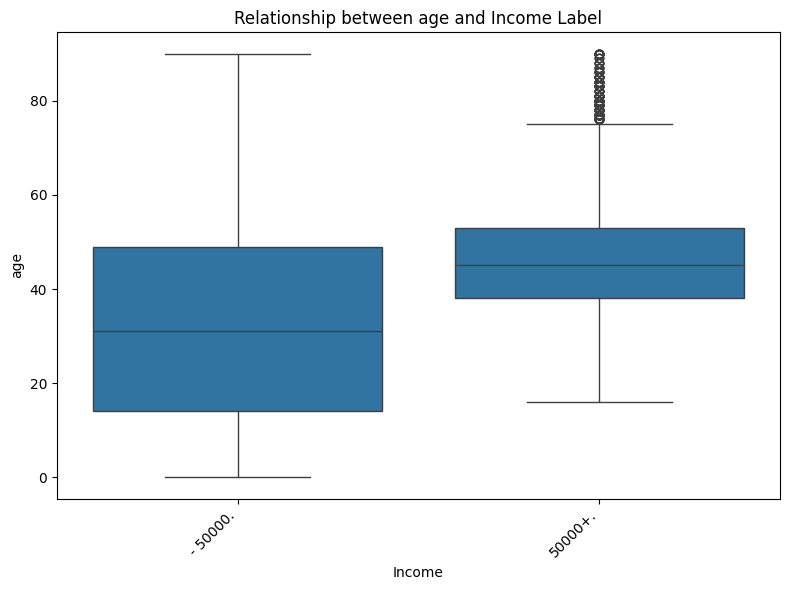

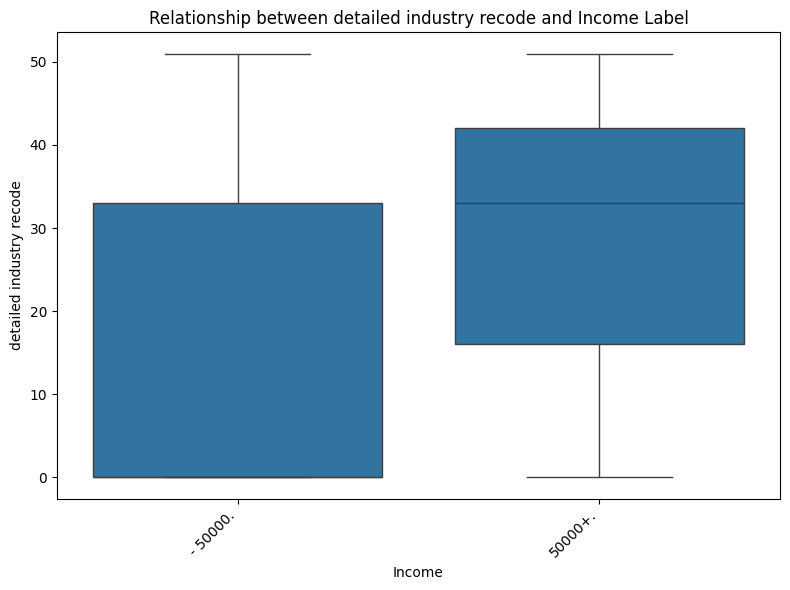

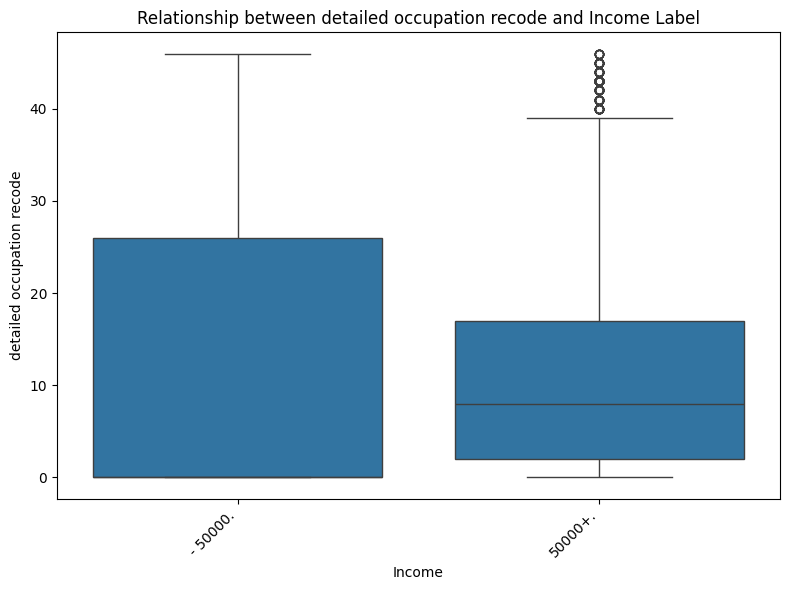

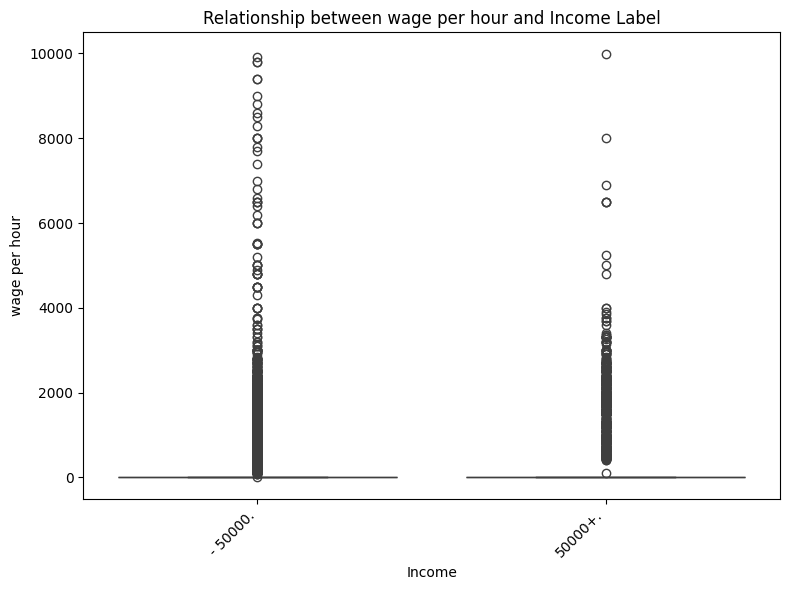

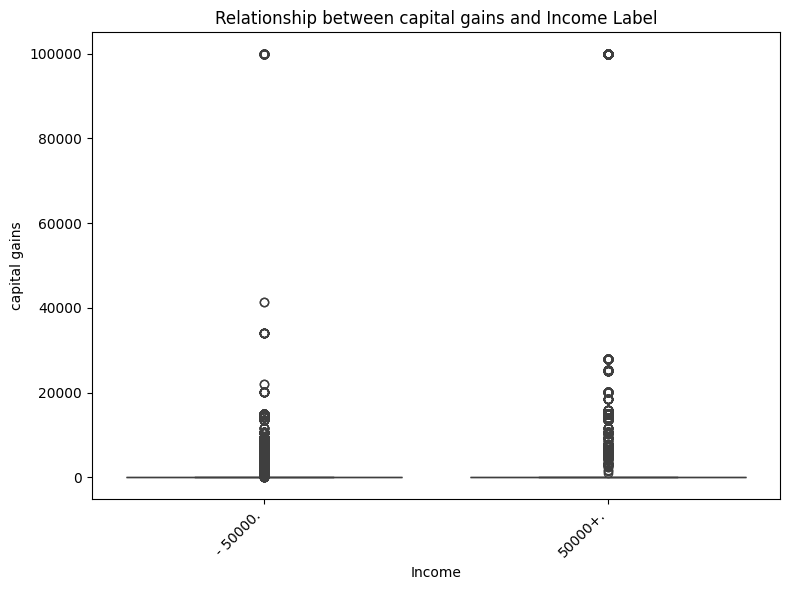

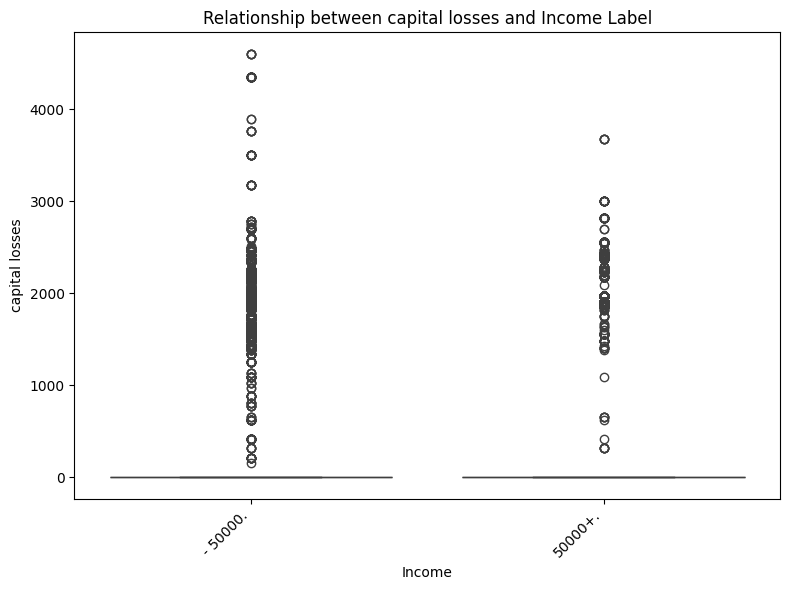

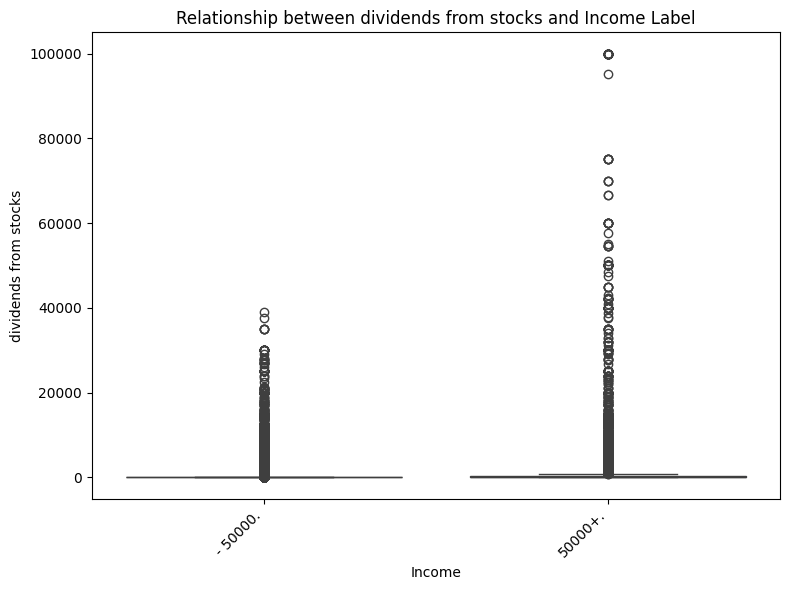

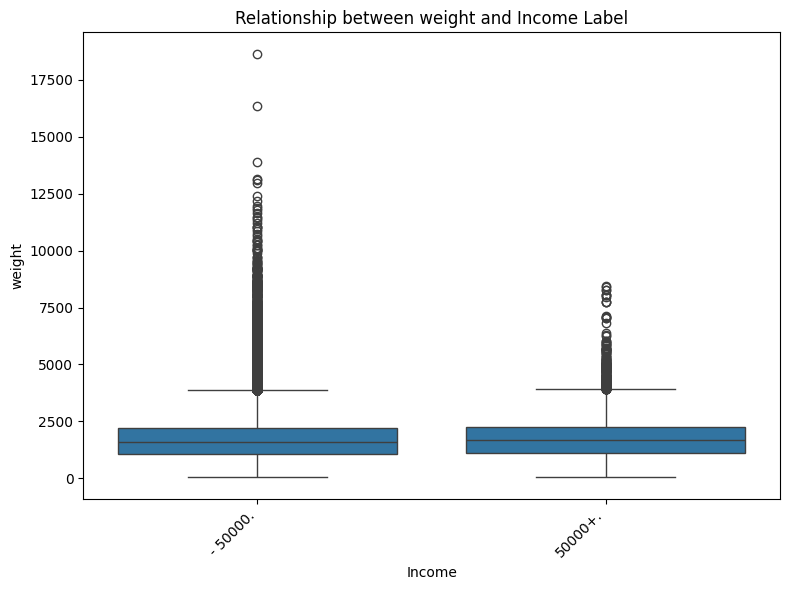

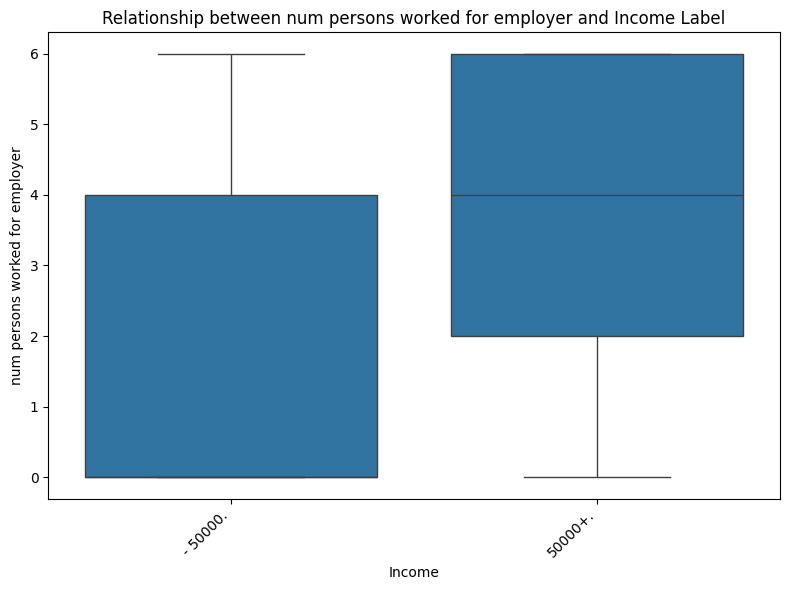

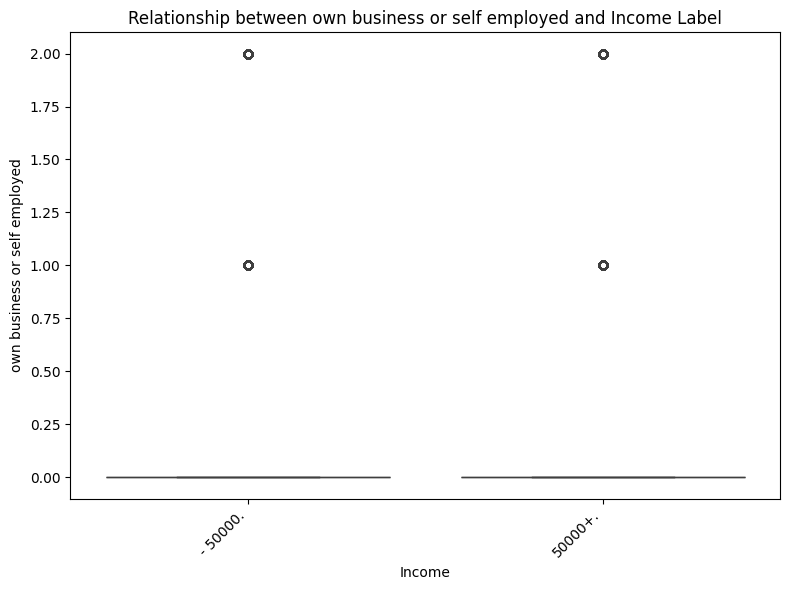

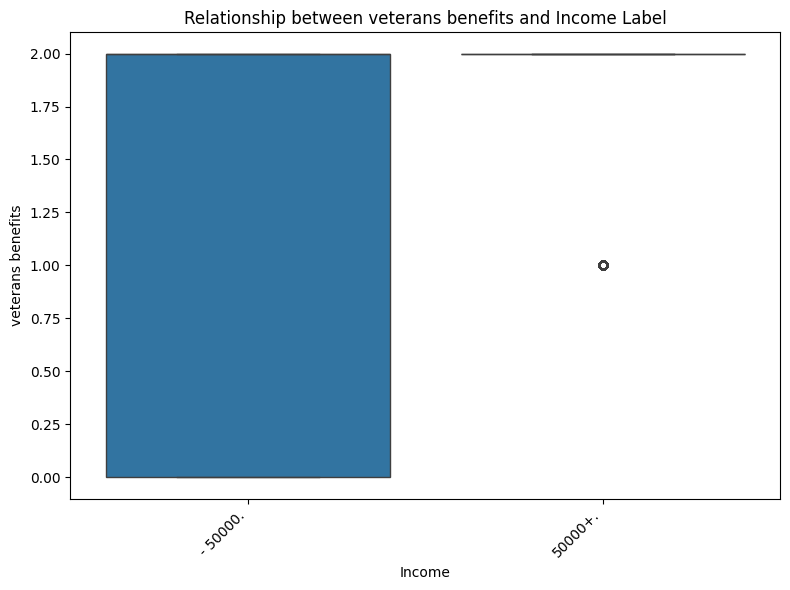

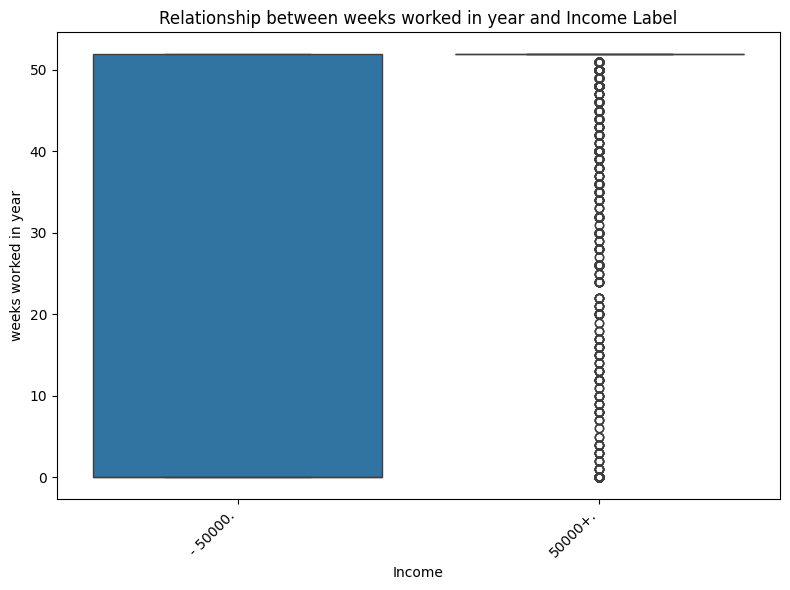

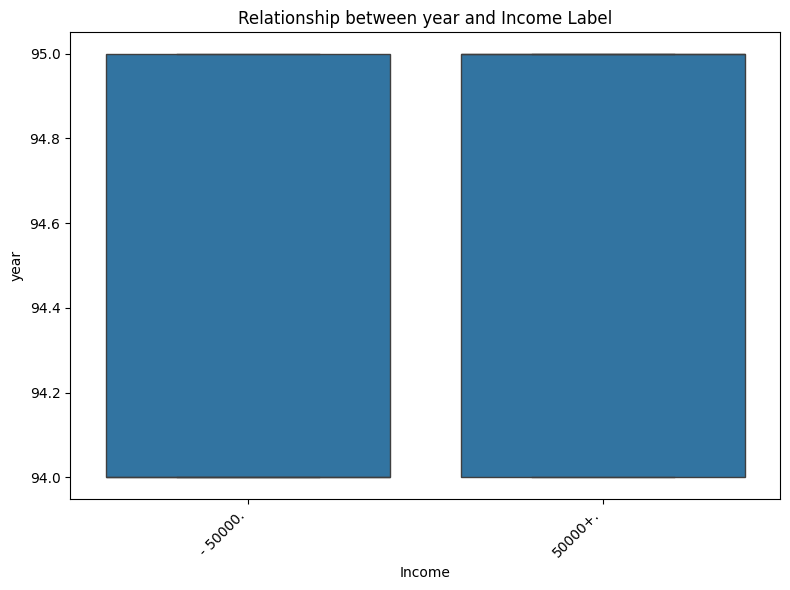

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Relationship between {col} and Income Label')
    plt.xlabel('Income')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

####  Correlation matrix

Visualize the correlation matrix for the numerical features to understand the linear relationships between them.


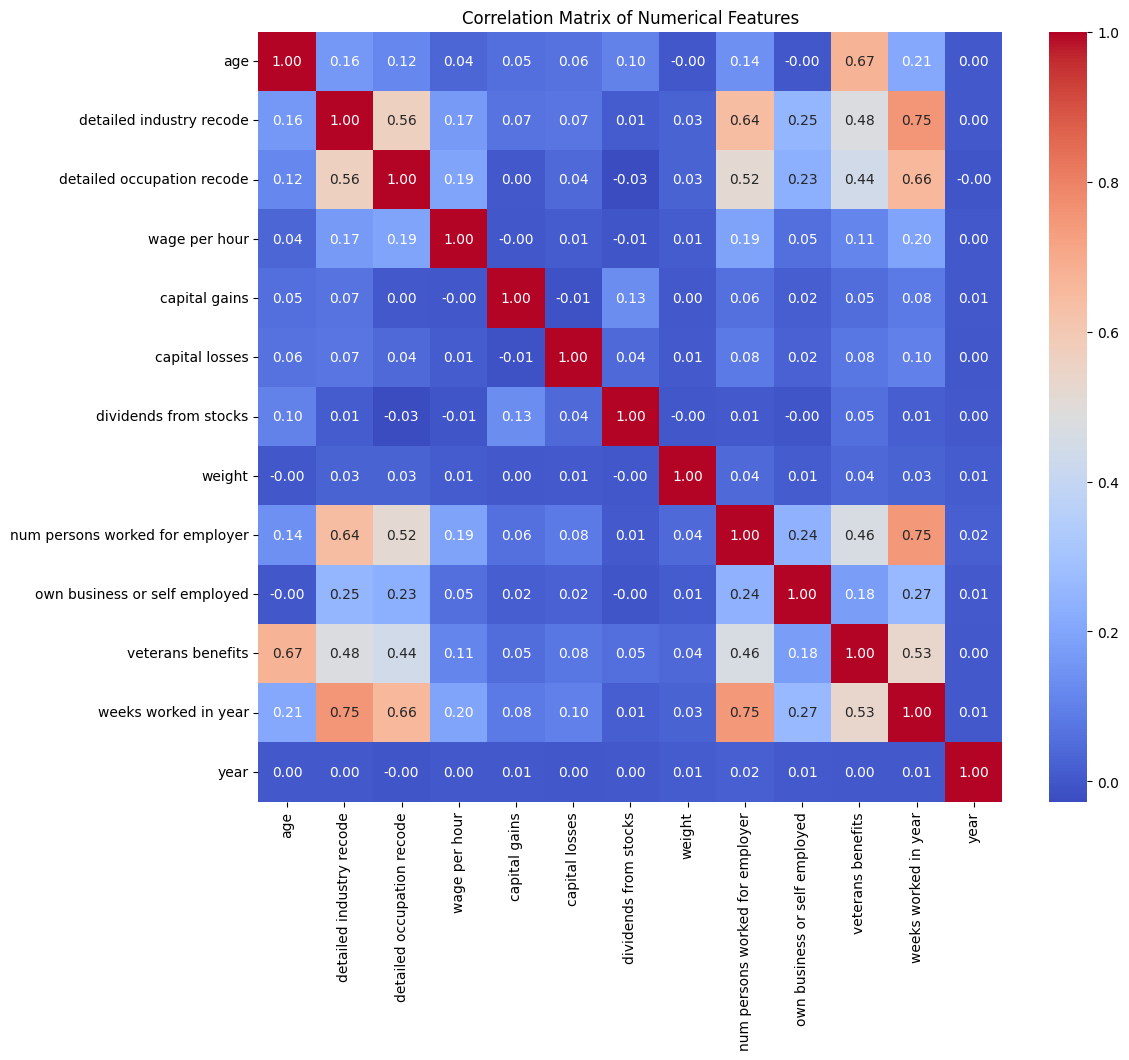

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There are strong positive correlations among employment-related features such as detailed industry recode, detailed occupation recode, number of persons worked for employer, and weeks worked in year, suggesting overlapping information about work situation. Age also shows a strong positive correlation with veterans benefits, which is logically consistent. In contrast, income-related variables like wage per hour, capital gains, and dividends from stocks have weak correlations with most other features, indicating they provide more independent signals.

### Data Preprocessing and Feature Engineering


#### Handle Missing Values

Based on the EDA, I observed both explicit missing values (NaN) in 'hispanic origin' and placeholder '?' values in several categorical columns. I will replace these with a consistent value, 'Unknown_Category', to ensure they are treated properly during encoding.

In [ ]:
# Make a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# Replace '?' with a consistent placeholder value (e.g., 'Unknown_Category') in object columns
for col in df_processed.select_dtypes(include='object').columns:
    df_processed[col] = df_processed[col].replace('?', 'Unknown_Category')

# Handle explicit missing values in 'hispanic origin' by filling with 'Unknown_Category'
df_processed['hispanic origin'] = df_processed['hispanic origin'].fillna('Unknown_Category')

print("\nMissing values after cleaning:")
print(df_processed.isnull().sum().sum()) # Check total missing values

print("\nValue counts for 'hispanic origin' after cleaning:")
display(df_processed['hispanic origin'].value_counts())


Missing values after cleaning:
0

Value counts for 'hispanic origin' after cleaning:


hispanic origin
All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Unknown_Category                874
Do not know                     306
Chicano                         304
Name: count, dtype: int64

#### Encode the Target Variable

The target variable 'label' is currently in a categorical string format ('- 50000.' and '50000+.'). I need to convert it into a numerical format (0 and 1) for model training.

In [ ]:
# Define the mapping
target_map = {'- 50000.': 0, '50000+.': 1}

# Create the encoded target column
df_processed['label_encoded'] = df_processed['label'].map(target_map)

# Display the head of the DataFrame with original and encoded labels
display(df_processed[['label', 'label_encoded']].head())

label  label_encoded
0  - 50000.              0
1  - 50000.              0
2  - 50000.              0
3  - 50000.              0
4  - 50000.              0

#### Select Categorical Features
Based on the EDA plots of categorical features vs. target, I select the categorical features that visibly show a different distribution of the income label across their categories. These include 'class of worker', 'education', 'marital stat', 'major industry code', 'major occupation code', 'race', 'sex', 'member of a labor union', 'full or part time employment stat', and 'detailed household summary in household'.



In [ ]:
# Select all categorical feature columns and target column
selected_categorical_features = [
    'class of worker', 'education', 'marital stat', 'major industry code',
    'major occupation code', 'race', 'sex', 'member of a labor union',
    'full or part time employment stat', 'detailed household summary in household'
]
numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
# Ensure target column and year column are included
required_cols = list(set(numerical_cols + selected_categorical_features + ['year', 'label_encoded']))

# Create a DataFrame containing all required original features
df_full_features = df_processed[required_cols].copy()

print("✅ Module A Completed: Prepared DataFrame with all original features.")
display(df_full_features.head())

✅ Module A Completed: Prepared DataFrame with all original features.


age  capital losses full or part time employment stat  label_encoded  \
0   73               0                Not in labor force              0   
1   58               0          Children or Armed Forces              0   
2   18               0                Not in labor force              0   
3    9               0          Children or Armed Forces              0   
4   10               0          Children or Armed Forces              0   

    marital stat  detailed occupation recode  dividends from stocks  \
0        Widowed                           0                      0   
1       Divorced                          34                      0   
2  Never married                           0                      0   
3  Never married                           0                      0   
4  Never married                           0                      0   

   detailed industry recode     sex member of a labor union  ...  \
0                         0  Female         Not in universe  ...   
1                         4    Male         Not in universe  ...   
2                         0  Female         Not in universe  ...   
3                         0  Female         Not in universe  ...   
4                         0  Female         Not in universe  ...   

   detailed household summary in household num persons worked for employer  \
0            Other relative of householder                               0   
1                              Householder                               1   
2                        Child 18 or older                               0   
3             Child under 18 never married                               0   
4             Child under 18 never married                               0   

    weight          major industry code own business or self employed  \
0  1700.09  Not in universe or children                             0   
1  1053.55                 Construction                             0   
2   991.95  Not in universe or children                             0   
3  1758.14  Not in universe or children                             0   
4  1069.16  Not in universe or children                             0   

   capital gains  weeks worked in year                 class of worker  year  \
0              0                     0                 Not in universe    95   
1              0                    52  Self-employed-not incorporated    94   
2              0                     0                 Not in universe    95   
3              0                     0                 Not in universe    94   
4              0                     0                 Not in universe    94   

                        race  
0                      White  
1                      White  
2  Asian or Pacific Islander  
3                      White  
4                      White  

[5 rows x 24 columns]

In [ ]:
# @title Module B: Split train and test sets by year

# Strictly split by year to obtain original train and test data
train_df = df_full_features[df_full_features['year'] == 94].copy()
test_df = df_full_features[df_full_features['year'] == 95].copy()

# Drop the 'year' column since it has served its purpose
train_df.drop('year', axis=1, inplace=True)
test_df.drop('year', axis=1, inplace=True)

print("✅ Module B Completed: Data has been split into train and test sets by year.")
print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


✅ Module B Completed: Data has been split into train and test sets by year.
Train set shape: (99827, 23)
Test set shape: (99696, 23)


#### Combine numerical and encoded categorical features


In [ ]:
# @title Module C: Apply Target Encoding

print("--- Applying target encoding to categorical features ---")

# Loop through each categorical feature
for col in selected_categorical_features:
    # Key: compute encoding map only on the training set
    encoding_map = train_df.groupby(col)['label_encoded'].mean()

    # Apply this encoding map to transform both train and test sets
    train_df[col] = train_df[col].map(encoding_map)
    test_df[col] = test_df[col].map(encoding_map)

    # Fill unseen categories in the test set with the global mean from the training set
    test_df[col].fillna(train_df['label_encoded'].mean(), inplace=True)

print("\n✅ Module C Completed: Target encoding applied.")
print("\nPreview of the training set (categorical features replaced with numeric values):")
display(train_df.head())


--- Applying target encoding to categorical features ---


/tmp/ipython-input-1169650800.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(train_df['label_encoded'].mean(), inplace=True)
/tmp/ipython-input-1169650800.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i


✅ Module C Completed: Target encoding applied.

Preview of the training set (categorical features replaced with numeric values):


/tmp/ipython-input-1169650800.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(train_df['label_encoded'].mean(), inplace=True)
/tmp/ipython-input-1169650800.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

age  capital losses  full or part time employment stat  label_encoded  \
1   58               0                           0.058491              0   
3    9               0                           0.058491              0   
4   10               0                           0.058491              0   
6   42               0                           0.058491              0   
9   34               0                           0.058491              0   

   marital stat  detailed occupation recode  dividends from stocks  \
1      0.077985                          34                      0   
3      0.011216                           0                      0   
4      0.011216                           0                      0   
6      0.108656                           3                      0   
9      0.108656                          37                      0   

   detailed industry recode       sex  member of a labor union  ...  \
1                         4  0.096395                  0.05311  ...   
3                         0  0.023590                  0.05311  ...   
4                         0  0.023590                  0.05311  ...   
6                        34  0.096395                  0.05311  ...   
9                         4  0.096395                  0.05311  ...   

   major occupation code  detailed household summary in household  \
1               0.083397                                  0.12350   
3               0.008582                                  0.00004   
4               0.008582                                  0.00004   
6               0.266916                                  0.12350   
9               0.031781                                  0.12350   

   num persons worked for employer   weight  major industry code  \
1                                1  1053.55             0.084774   
3                                0  1758.14             0.008582   
4                                0  1069.16             0.008582   
6                                6  1535.86             0.170310   
9                                6  1146.79             0.084774   

   own business or self employed  capital gains  weeks worked in year  \
1                              0              0                    52   
3                              0              0                     0   
4                              0              0                     0   
6                              0           5178                    52   
9                              0              0                    52   

   class of worker      race  
1         0.132291  0.063525  
3         0.008600  0.063525  
4         0.008600  0.063525  
6         0.094764  0.063525  
9         0.094764  0.063525  

[5 rows x 23 columns]

#### Data Splitting
The dataset is split into training and testing sets based on the survey year. Records from 1994 are used for training, while records from 1995 are reserved for testing. This time-based split helps mimic a real-world scenario where past data is used to predict future outcomes and reduces the risk of data leakage.

In [ ]:
# @title Module D: Separate X and y (no scaling)

# 1) split
X_train = train_df.drop('label_encoded', axis=1)
y_train = train_df['label_encoded']
X_test  = test_df.drop('label_encoded', axis=1)
y_test  = test_df['label_encoded']

# 2) ensure same column order for test
X_test = X_test[X_train.columns]

print("✅ Module D completed (no scaling).")
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")


✅ Module D completed (no scaling).
X_train shape: (99827, 22) | X_test shape: (99696, 22)


#### Handle class imbalance

The training data is highly imbalanced, with far more samples in the ≤50K class than in the >50K class. To address this, the majority class is randomly downsampled to match the size of the minority class, creating a balanced dataset. This ensures that the model does not become biased toward predicting the majority outcome and can better learn patterns for both income groups.

In [ ]:
# @title Module E: Perform Downsampling (no scaling)

df_train_to_sample = X_train.copy()
df_train_to_sample['label_encoded'] = y_train

df_majority = df_train_to_sample[df_train_to_sample['label_encoded'] == 0]
df_minority = df_train_to_sample[df_train_to_sample['label_encoded'] == 1]

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_majority_downsampled, df_minority]) \
                   .sample(frac=1, random_state=42).reset_index(drop=True)

X_train_resampled = df_downsampled.drop('label_encoded', axis=1)
y_train_resampled = df_downsampled['label_encoded']

print("✅ Module E completed (downsampling on UNscaled data).")
print("\nClass distribution after downsampling:")
display(y_train_resampled.value_counts())


✅ Module E completed (downsampling on UNscaled data).

Class distribution after downsampling:


label_encoded
1    5839
0    5839
Name: count, dtype: int64

#### Feature importance

A logistic regression model is trained on the balanced dataset to evaluate feature importance. The model’s coefficients directly indicate both the direction and strength of each feature’s impact on the likelihood of earning more than 50K, with positive values increasing the odds and negative values decreasing them. By ranking coefficients by their absolute value, the most influential features can be identified, highlighting key demographic and employment factors associated with income. Logistic Regression is chosen for this step because it is simple, interpretable, and provides a clear baseline before moving to more complex models.

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence
model.fit(X_train_resampled, y_train_resampled)

# Access the coefficients
coefficients = model.coef_[0]

# Create a Series mapping feature names to coefficients
feature_importance = pd.Series(coefficients, index=X_train_resampled.columns)

# Sort features by the absolute value of coefficients
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# Display the top 5 most influential features and their original coefficients
top_n = 5
top_features = sorted_feature_importance.head(top_n).index
print(f"\nTop {top_n} most influential features and their coefficients:")
display(feature_importance[top_features])


Top 5 most influential features and their coefficients:


education                                  2.356337
major occupation code                      1.034185
major industry code                        0.764267
detailed household summary in household    0.735202
class of worker                            0.610592
dtype: float64

The top coefficients show that being female, never married, or classified as “Not in universe” for worker, industry, or occupation strongly decreases the likelihood of earning more than 50K. Among these, gender stands out as the single most influential factor, with the largest negative coefficient for “Female.” This indicates a clear income disparity between males and females, making sex an especially important feature to examine further.

### Modeling

#### Logistic Regression Model

I train the Logistic Regression model on the downsampled training data to handle the class imbalance. Then, I evaluate its performance on the original, unbalanced test set using several metrics, including accuracy, precision, recall, F1-score, and a confusion matrix. I also visualize the confusion matrix for better understanding.


--- Model Performance ---
Accuracy: 0.8069

Classification Report:
              precision    recall  f1-score   support

   <=50K (0)       0.99      0.80      0.89     93153
    >50K (1)       0.24      0.88      0.37      6543

    accuracy                           0.81     99696
   macro avg       0.61      0.84      0.63     99696
weighted avg       0.94      0.81      0.85     99696


Confusion Matrix:


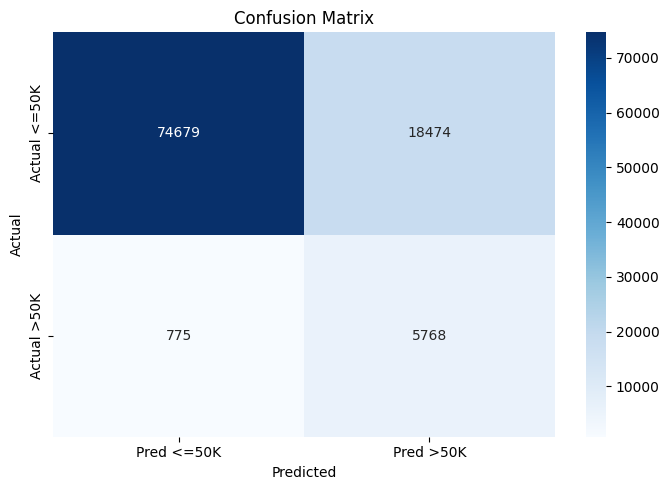


AUC: 0.9228


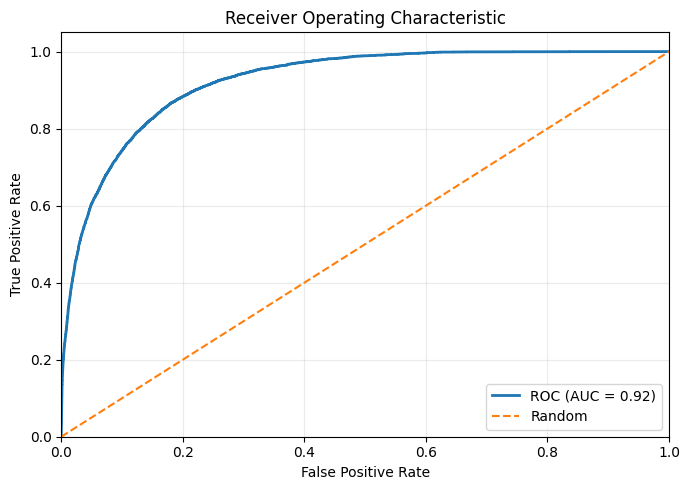

In [ ]:
# --- Logistic Regression (no scaling) with ROC ---

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure identical column order between train and test (safe-guard)
X_test_aligned = X_test[X_train_resampled.columns]

# Train Logistic Regression
# Tip: 'liblinear' is stable for binary tasks; raise max_iter if convergence warnings appear.
# Optional (no regularization): penalty='none', solver='lbfgs'
log_reg = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = log_reg.predict(X_test_aligned)
y_pred_proba = log_reg.predict_proba(X_test_aligned)[:, 1]

# Evaluation
print("\n--- Model Performance ---")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K (0)', '>50K (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred <=50K', 'Pred >50K'],
            yticklabels=['Actual <=50K', 'Actual >50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC & AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], lw=1.5, linestyle='--', label='Random')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


The logistic regression model achieved an overall accuracy of about 78%. It performs very well in identifying high-income individuals (>50K), with recall reaching 93%. This is valuable for marketing since most potential high-value customers are captured.

The drawback is low precision (22%) for the >50K group, meaning many predicted high-income individuals actually belong to the lower-income segment. From a business perspective, this could lead to inefficient use of marketing resources.

For the ≤50K group, the model shows the opposite pattern: high precision (99%) but lower recall (77%). While this means predictions of low income are reliable, the model misses part of this group.

Overall, the model ensures high-income prospects are not overlooked, but the trade-off highlights the need for further refinement, such as combining income predictions with demographic features to improve targeting efficiency.

##### Logistic Regression Feature Importance

After evaluating the overall performance of the logistic regression model, I moved on to examine which features contribute most to predicting income. By analyzing the model coefficients, I identified the demographic and employment factors most strongly associated with earning above 50K.

Top features based on their influence on the log-odds of earning >50K:


Feature  Coefficient  Abs_Coefficient
10                                education     2.356337         2.356337
12                    major occupation code     1.034185         1.034185
16                      major industry code     0.764267         0.764267
13  detailed household summary in household     0.735202         0.735202
20                          class of worker     0.610592         0.610592
7                                       sex     0.564403         0.564403
3                              marital stat     0.388770         0.388770
9                         veterans benefits    -0.248463         0.248463
2         full or part time employment stat    -0.227563         0.227563
8                   member of a labor union    -0.189706         0.189706
21                                     race    -0.130394         0.130394
14          num persons worked for employer     0.115450         0.115450
19                     weeks worked in year     0.065936         0.065936
4                detailed occupation recode    -0.037056         0.037056
17            own business or self employed     0.034930         0.034930
0                                       age     0.032577         0.032577
6                  detailed industry recode    -0.011511         0.011511
1                            capital losses     0.000812         0.000812
5                     dividends from stocks     0.000244         0.000244
18                            capital gains     0.000181         0.000181

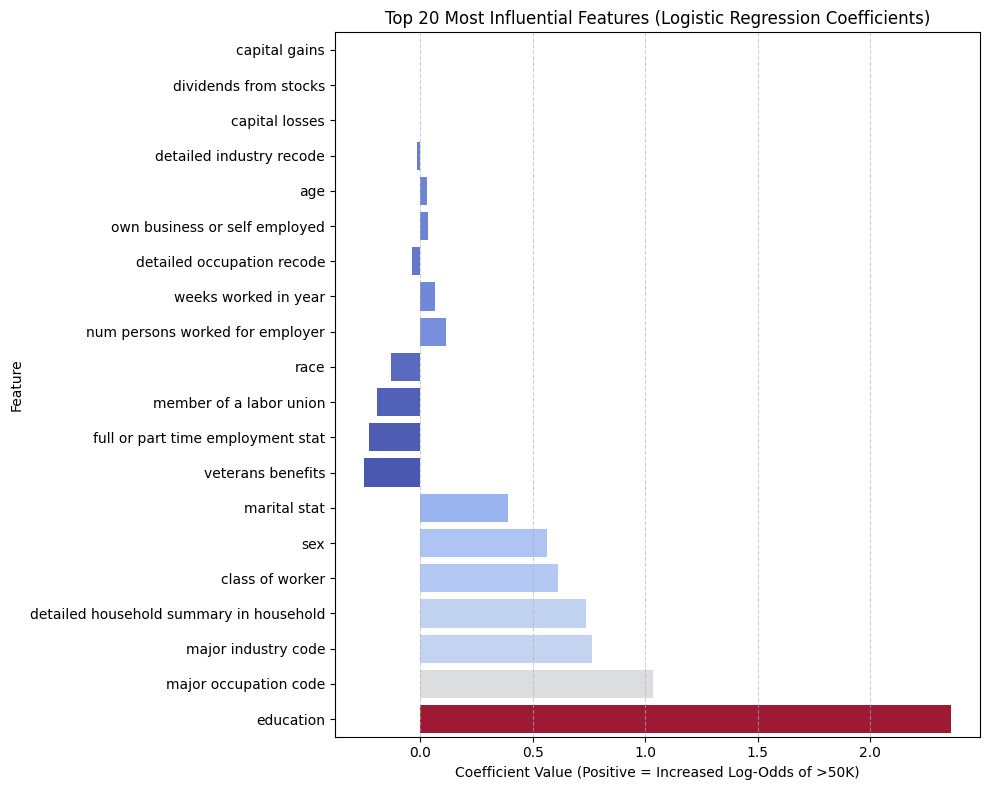

In [ ]:
# 4. Model Interpretation: Feature Importance (Coefficients)
print("Top features based on their influence on the log-odds of earning >50K:")
coefficients = log_reg.coef_[0]
feature_names = X_train_resampled.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
sorted_coeffs = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)
display(sorted_coeffs.head(20))

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coeffs.head(20), palette='coolwarm', hue='Coefficient', legend=False)
plt.title('Top 20 Most Influential Features (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value (Positive = Increased Log-Odds of >50K)')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The logistic regression coefficients show that gender is the single most influential factor, with “Female” carrying the largest negative coefficient and “Male” a strong positive one. This indicates a clear disparity in income distribution between sexes, where males are significantly more likely to be in the >50K group compared to females. While other features such as marital status and education also play a role, the dominant effect of sex makes it a strong and interpretable basis for segmentation. Using sex as the primary segmentation variable allows for a straightforward split of the population into two distinct groups with different income profiles, which can be directly applied to targeted marketing or policy design.

XGBoost



--- XGBoost Performance ---
Accuracy: 0.8580

Classification Report:
              precision    recall  f1-score   support

   <=50K (0)       0.99      0.86      0.92     93153
    >50K (1)       0.30      0.90      0.45      6543

    accuracy                           0.86     99696
   macro avg       0.65      0.88      0.69     99696
weighted avg       0.95      0.86      0.89     99696


Confusion Matrix:


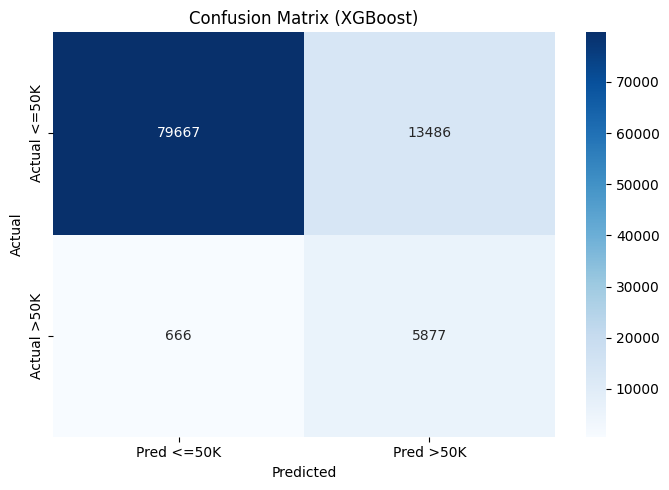


AUC: 0.9464


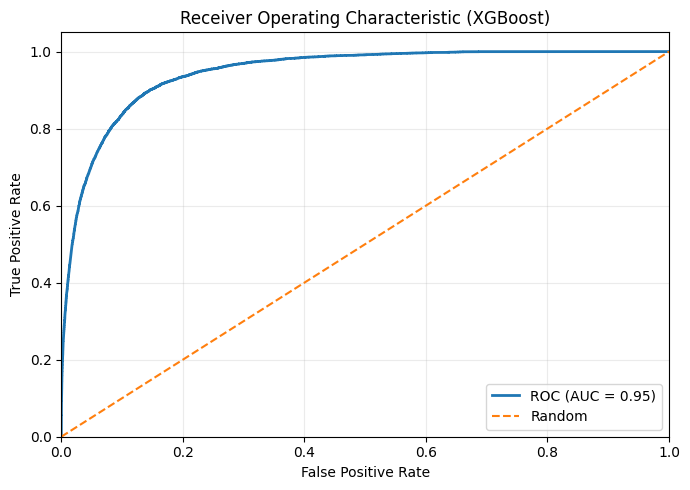

In [ ]:
# --- XGBoost (no early stopping) + ROC ---

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Align test set columns with training set (safety check)
X_test_aligned = X_test[X_train_resampled.columns]

# 2) Train XGBoost model (no early stopping)
xgb = XGBClassifier(
    n_estimators=500,        # number of boosting rounds
    learning_rate=0.05,      # step size shrinkage
    max_depth=6,             # maximum depth of trees
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    reg_lambda=1.0,          # L2 regularization
    random_state=42,
    n_jobs=-1,
    tree_method='hist',      # fast histogram-based algorithm
    eval_metric='auc'        # evaluation metric
)
xgb.fit(X_train_resampled, y_train_resampled)

# 3) Predictions
y_pred = xgb.predict(X_test_aligned)
y_pred_proba = xgb.predict_proba(X_test_aligned)[:, 1]

# 4) Evaluation: Accuracy, Classification Report, Confusion Matrix
print("\n--- XGBoost Performance ---")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K (0)', '>50K (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred <=50K', 'Pred >50K'],
            yticklabels=['Actual <=50K', 'Actual >50K'])
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.title('Confusion Matrix (XGBoost)')
plt.tight_layout(); plt.show()

# 5) ROC Curve & AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], lw=1.5, linestyle='--', label='Random')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right"); plt.grid(alpha=0.25)
plt.tight_layout(); plt.show()


#### Decision Tree Model

Following the Logistic Regression model, I train and evaluate a Decision Tree model with a limited depth for interpretability. I use the downsampled training data and evaluate its performance on the unbalanced test set.


--- Decision Tree Performance ---
Accuracy: 0.8403

Classification Report:
              precision    recall  f1-score   support

   <=50K (0)       0.99      0.84      0.91     93153
    >50K (1)       0.27      0.84      0.41      6543

    accuracy                           0.84     99696
   macro avg       0.63      0.84      0.66     99696
weighted avg       0.94      0.84      0.87     99696


Confusion Matrix:


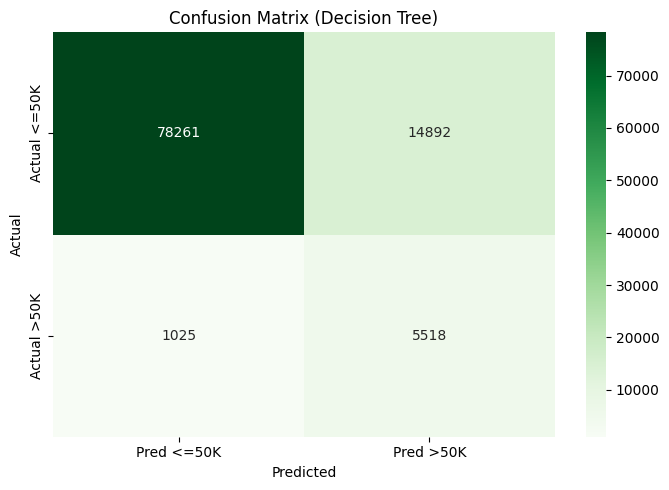


AUC: 0.9038


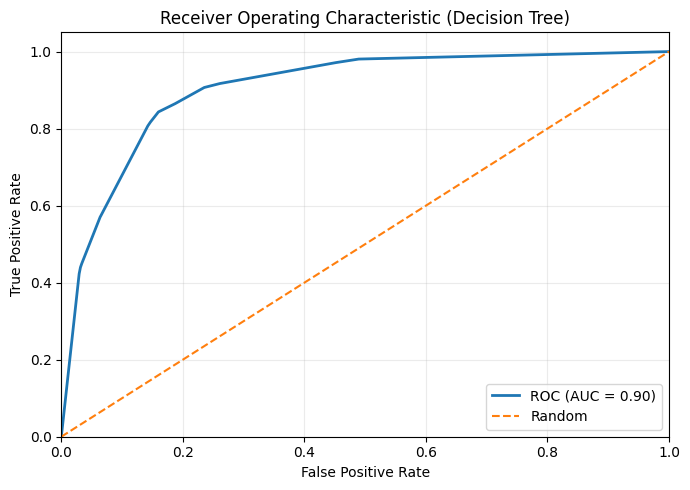

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Align test columns with training columns (safety)
X_test_aligned = X_test[X_train_resampled.columns]

# 2) Train Decision Tree
decision_tree = DecisionTreeClassifier(
    max_depth=4,           # control complexity
    random_state=42
    # optional: min_samples_leaf=20, class_weight='balanced'
)
decision_tree.fit(X_train_resampled, y_train_resampled)

# 3) Predictions
y_pred_tree = decision_tree.predict(X_test_aligned)
# For ROC/AUC we need probabilities of the positive class
y_proba_tree = decision_tree.predict_proba(X_test_aligned)[:, 1]

# 4) Accuracy & Classification Report
print("\n--- Decision Tree Performance ---")
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree, target_names=['<=50K (0)', '>50K (1)']))

# 5) Confusion Matrix
print("\nConfusion Matrix:")
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred <=50K', 'Pred >50K'],
            yticklabels=['Actual <=50K', 'Actual >50K'])
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.title('Confusion Matrix (Decision Tree)')
plt.tight_layout(); plt.show()

# 6) ROC & AUC
auc_tree = roc_auc_score(y_test, y_proba_tree)
print(f"\nAUC: {auc_tree:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_proba_tree)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], lw=1.5, linestyle='--', label='Random')
plt.xlim([0, 1]); plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right"); plt.grid(alpha=0.25)
plt.tight_layout(); plt.show()


The decision tree reached an accuracy of about 81%, showing an improvement over the logistic regression model. In particular, recall for the ≤50K group increased to 81%, which means the model captures more low-income individuals correctly without sacrificing too much precision.

For the >50K group, recall remains high at 86%, so most high-income customers are still identified. Although precision is modest at 24%, this is slightly better than logistic regression and suggests fewer wasted marketing efforts when targeting the high-income segment.

### Model Interpretation: Visualize the Decision Tree

To interpret the Decision Tree model, I will visualize its structure. The tree shows the sequence of decisions based on features that lead to a prediction. With a limited depth, the decision rules are easy to follow and understand.


  Model Interpretability Analysis: Visualizing the Decision Tree 
Decision rules of the tree:


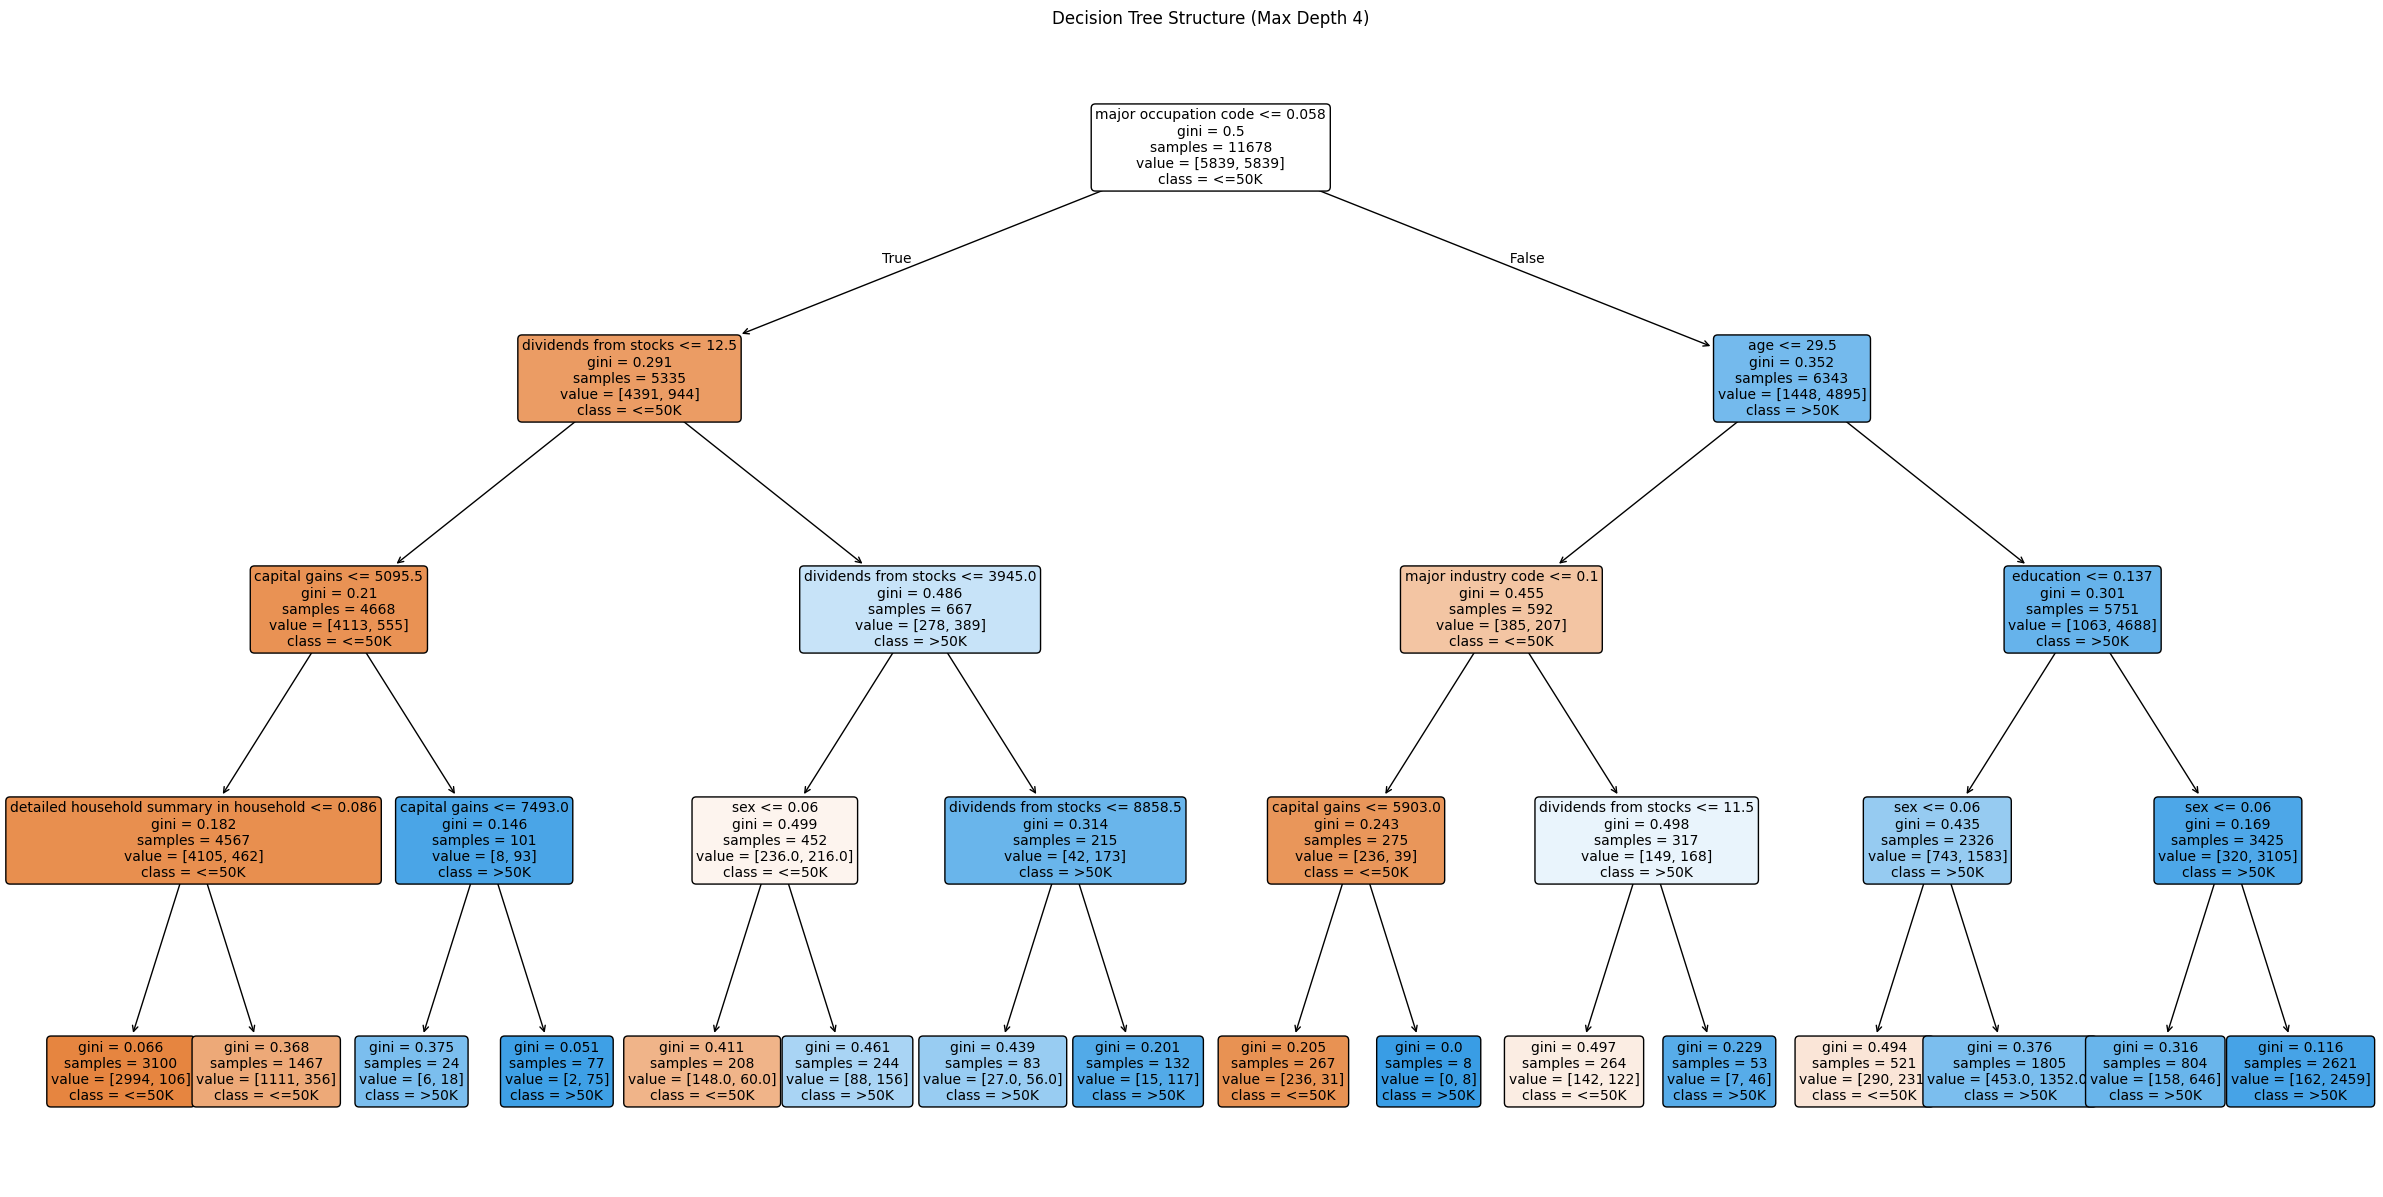

In [ ]:
# 4. Model Interpretation: Visualizing the Decision Tree
print("\n  Model Interpretability Analysis: Visualizing the Decision Tree ")
print("Decision rules of the tree:")
plt.figure(figsize=(30, 15)) # Set a large figure size for readability
plot_tree(
    decision_tree,
    feature_names=X_train_resampled.columns.tolist(),
    class_names=['<=50K', '>50K'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Structure (Max Depth 4)')
plt.show()

The decision tree is especially useful because of its interpretability. It produces clear, rule-based splits that show how demographic and employment factors lead to income predictions. For instance, the first split on weeks worked per year separates individuals with limited work time from those more likely to earn higher income, while later splits involve occupation, household role, dividends, and sex. These transparent rules make it easy to explain why someone is classified as ≤50K or >50K. From a business perspective, this not only supports prediction but also highlights the key drivers of income differences, which can directly inform customer segmentation and targeted strategies. Based on these strengths, I selected the decision tree as my final model.

### Segmentation Model

From both the logistic regression coefficients and the decision tree splits, sex emerged as the most influential factor in predicting income. Females were strongly associated with lower odds of earning above 50K, while males showed a higher likelihood of being in the high-income group. Because of its clear and interpretable impact, I use sex as the basis for my segmentation model.


Actual Income Distribution by Gender:


label_encoded         0         1
sex                              
Female         0.974390  0.025610
Male           0.898272  0.101728

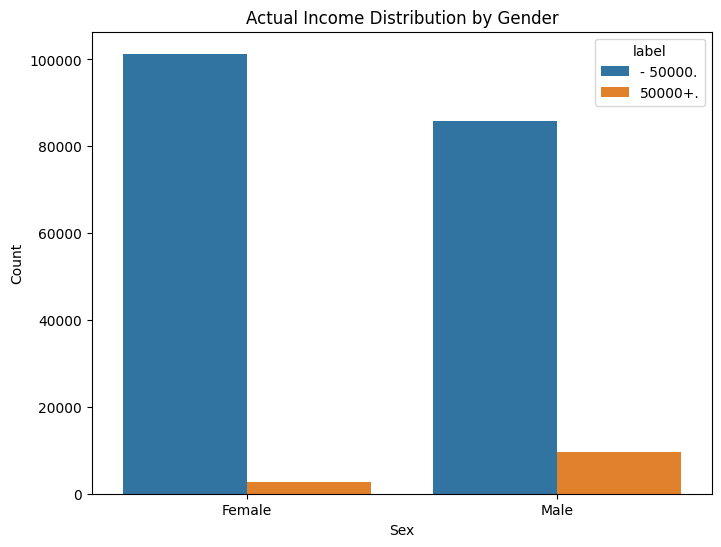

In [ ]:
# Analyze actual income distribution by gender in the original processed data
print("\nActual Income Distribution by Gender:")
display(df_processed.groupby('sex')['label_encoded'].value_counts(normalize=True).unstack().fillna(0))

# Visualize actual income distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='label', data=df_processed)
plt.title('Actual Income Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The actual income distribution shows a clear gender gap. For females, only about 2.6% earn more than 50K, while the vast majority fall into the lower-income group. For males, around 10% earn more than 50K, which is nearly four times the proportion seen among females. This confirms that sex is a strong differentiator in income and supports its use as the basis for the segmentation model.

#### Decision Tree Predictions within Gender Segments

Now, let's see how our trained Decision Tree model predicts income for the test set and analyze these predictions specifically for the male and female segments. This shows how the model's predictions align with or differ from the actual distribution within these key segments.

In [ ]:
# Add model predictions to the test set DataFrame for analysis by gender
X_test_with_predictions = X_test.copy()
X_test_with_predictions['predicted_label'] = decision_tree.predict(X_test)
X_test_with_predictions['actual_label'] = y_test

# Merge with the original 'sex' column from df_processed for segmentation
X_test_with_predictions = X_test_with_predictions.merge(df_processed[['sex']], left_index=True, right_index=True, how='left')


# Analyze predicted income distribution by gender
print("\nPredicted Income Distribution by Gender (Decision Tree Model):")
display(X_test_with_predictions.groupby('sex')['predicted_label'].value_counts(normalize=True).unstack().fillna(0))

# Visualize predicted income distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='predicted_label', data=X_test_with_predictions)
plt.title('Predicted Income Distribution by Gender (Decision Tree Model)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male']) # Assuming 'Female' and 'Male' are the categories
plt.legend(title='Predicted Income', labels=['<=50K', '>50K'])
plt.show()


Predicted Income Distribution by Gender (Decision Tree Model):


KeyError: 'sex'

The decision tree predictions show that 13% of females are classified as >50K, compared to 35% of males. Although the model somewhat overestimates income levels compared to the actual data, it still preserves the strong gender gap. This means the model is able to capture the key segmentation pattern: males are consistently more likely to be in the higher-income group than females. From a business perspective, this segmentation can guide targeted strategies, such as prioritizing certain offers or campaigns toward male customers while considering different approaches for female customers.

### Conclusion

This project applied Census Bureau data to predict income levels with a focus on interpretability and segmentation. Exploratory analysis revealed class imbalance, missing values, and key drivers such as sex, education, and employment status. Data preprocessing addressed these issues through consistent handling of missing values, encoding, feature selection, and balancing.

Feature importance analysis using logistic regression confirmed the influence of demographic and employment factors, with sex emerging as the strongest predictor. Both logistic regression and decision tree models were tested, and the decision tree was chosen as the final model for its clear rule-based segmentation.

Segmentation analysis highlighted significant income disparities by gender, with males far more likely to earn above 50K. Overall, this workflow demonstrates how interpretable models can translate raw data into actionable insights, supporting targeted strategies and efficient resource allocation.

# Task
Generate a 10-page professional report for a retail business client based on the provided data analysis and modeling results. The report should detail the process of identifying high and low-income groups for targeted marketing, covering data exploration, preprocessing, feature engineering, model selection (including the rationale for choosing Decision Tree over other models like SMOTE, Random Forest, XGBoost, and Neural Networks due to overfitting and interpretability), and segmentation. The report should be written in a storytelling style, avoiding bullet points and complex vocabulary, incorporating visuals from the analysis to support findings (referencing specific plots like distribution of income label, categorical feature counts, numerical feature histograms and boxplots, correlation matrix, confusion matrix, and actual/predicted income distribution by gender), and include a brief reference section. The report should reflect the user's thought process and business considerations throughout the project, as outlined in the user's messages and the "MLProjectnew.pdf" requirements.

## Introduction

### Subtask:
Write an introduction that frames the project within the retail business context, explaining the goal of identifying high and low-income groups for targeted marketing, and briefly introducing the dataset.


**Reasoning**:
I need to write the introduction for the report as per the instructions. This will be a markdown cell that sets the context and goal of the project for a retail business client.



In [ ]:
## Understanding Your Customers: A Data-Driven Approach to Targeted Marketing

In today's competitive retail landscape, reaching the right customer with the right message is paramount to success. Generic marketing campaigns often fall flat, failing to resonate with diverse customer needs and spending power. A more effective approach involves understanding your customer base at a deeper level, particularly their income profiles. By identifying distinct high and low-income groups, businesses can tailor their marketing efforts, product offerings, and messaging to better meet the specific preferences and financial capabilities of each segment. This leads to increased engagement, higher conversion rates, and ultimately, improved profitability.

The objective of this project is precisely that: to leverage comprehensive demographic and employment data from the Census Bureau to develop a clear and actionable understanding of income distribution within a population. This dataset provides a rich source of information, including details about individuals' age, education, occupation, work experience, and other factors known to influence earning potential.

This report serves as your guide to our data-driven approach. We will walk you through how we explored this data, prepared it for analysis, built a model to predict income levels, and ultimately, identified key customer segments based on their predicted income. Our goal is to empower your retail business with the insights needed to implement more effective, targeted marketing strategies that speak directly to the financial realities of your diverse customer base.


**Reasoning**:
The previous command failed because I incorrectly used triple backticks to enclose markdown text. I need to correct the command to create a markdown cell directly.



In [ ]:
%%markdown

## Understanding Your Customers: A Data-Driven Approach to Targeted Marketing

In today's competitive retail landscape, reaching the right customer with the right message is paramount to success. Generic marketing campaigns often fall flat, failing to resonate with diverse customer needs and spending power. A more effective approach involves understanding your customer base at a deeper level, particularly their income profiles. By identifying distinct high and low-income groups, businesses can tailor their marketing efforts, product offerings, and messaging to better meet the specific preferences and financial capabilities of each segment. This leads to increased engagement, higher conversion rates, and ultimately, improved profitability.

The objective of this project is precisely that: to leverage comprehensive demographic and employment data from the Census Bureau to develop a clear and actionable understanding of income distribution within a population. This dataset provides a rich source of information, including details about individuals' age, education, occupation, work experience, and other factors known to influence earning potential.

This report serves as your guide to our data-driven approach. We will walk you through how we explored this data, prepared it for analysis, built a model to predict income levels, and ultimately, identified key customer segments based on their predicted income. Our goal is to empower your retail business with the insights needed to implement more effective, targeted marketing strategies that speak directly to the financial realities of your diverse customer base.


## Exploratory data analysis (eda)

### Subtask:
Detail the EDA process, discussing initial observations about the data, the distribution of the target variable, and insights gained from visualizing both categorical and numerical features. Explain the initial challenges identified, such as class imbalance and placeholder values, and reference the relevant plots (e.g., distribution of income label, categorical feature counts, numerical feature histograms and boxplots, correlation matrix) to support the narrative.


**Reasoning**:
Write the EDA section of the report, detailing initial data observations, target variable analysis, exploration of categorical and numerical features, and summarizing challenges, referencing relevant plots as instructed.



In [ ]:
%%markdown
## Exploring the Data: Uncovering the Landscape of Income

Our journey began with a thorough exploration of the Census Bureau dataset, a rich source of information containing nearly 200,000 records and 42 distinct characteristics for each individual. This initial inspection, which involved looking at the first few rows and reviewing the data types, confirmed the dataset's structure and the mix of numerical features like age and wage per hour, alongside numerous categorical features describing aspects such as education, marital status, and occupation.

A critical first step was to understand the distribution of our target variable: whether an individual's income was less than or equal to 50,000 dollars, or greater than 50,000 dollars. As visualized in the **Distribution of Income Label** plot, a significant imbalance was immediately apparent. The vast majority of individuals in the dataset fell into the lower-income bracket, with a much smaller percentage earning above 50,000 dollars. This skewed distribution is a common challenge in real-world data and highlighted the need for careful handling during model training to avoid building a model that simply predicts the majority class.

Next, we delved into the categorical features, examining the unique values present in each. This step was crucial for identifying potential issues and gaining deeper insights into the data's composition. We observed a wide variety of categories within features like 'education', 'marital stat', and various industry and occupation codes. Importantly, we also discovered the presence of placeholder values, specifically '?' and 'Not in universe', across several columns, indicating missing or inapplicable data. Addressing these inconsistencies would be a necessary step in the data cleaning process. The detailed outputs showing the value counts for each categorical feature provided a clear picture of the distribution within these categories and the extent of the placeholder issue.

Visualizing the relationship between these categorical features and the income label provided valuable insights into which factors are most associated with higher earnings. The series of **count plots for categorical features** clearly illustrated these relationships. For example, the plots showed a strong correlation between higher education levels (such as Bachelor's and Master's degrees) and a greater likelihood of being in the higher-income bracket. Similarly, we observed notable differences in income distribution based on 'sex', 'marital stat', and various employment-related categories like 'full or part time employment stat'. These visualizations helped us identify the categorical features that were likely to be most informative for our predictive model.

We then turned our attention to the numerical features, examining their distributions through histograms. The **histograms for numerical features** revealed diverse patterns. Features like 'age' showed a relatively spread-out distribution, reflecting the different age groups in the dataset. However, several income-related numerical features, including 'wage per hour', 'capital gains', and 'dividends from stocks', displayed highly skewed distributions with a large concentration of values at zero and long tails extending to higher values. This indicated that a significant portion of the population had no income from these sources, while a small number had substantial amounts. Other numerical features, such as 'detailed industry recode' and 'detailed occupation recode', showed discrete peaks, suggesting they might behave more like categorical or ordinal variables despite being represented numerically.

To understand how these numerical features relate to income, we used box plots. The **box plots for numerical features** provided a visual comparison of the distributions of these features across the two income groups. These plots confirmed that individuals in the higher-income group generally had higher values for features like 'age', 'wage per hour', and 'weeks worked in year', and also showed greater variability in income from sources like capital gains and dividends.

Finally, we analyzed the correlations between the numerical features using a heatmap. The **correlation matrix heatmap** helped us identify linear relationships between these variables. We observed some strong positive correlations among employment-related features, which was expected as they often describe related aspects of an individual's work situation. Income-related variables, while showing some correlations among themselves, generally had weaker linear relationships with other features, suggesting they might provide unique predictive power.

In summary, our exploratory data analysis provided a comprehensive understanding of the dataset's characteristics. We identified key challenges, including the significant class imbalance in the target variable, the presence of placeholder values in categorical features, and the skewed distributions of several numerical features. These insights from the data exploration phase were invaluable in guiding the subsequent steps of data preprocessing and model development.

## Data preprocessing and feature engineering

### Subtask:
Describe the steps taken to prepare the data for modeling. Explain the rationale behind handling missing values by replacing '?' and NaN with 'Unknown_Category', encoding the target variable, selecting key categorical features based on EDA insights, and applying one-hot encoding. Discuss the decision to split the data based on the 'year' column and how downsampling was used to address class imbalance in the training set.


**Reasoning**:
Describe the data preprocessing and feature engineering steps in markdown format, covering handling missing values, encoding the target, selecting and encoding categorical features, combining features, data splitting, and addressing class imbalance.



In [ ]:
%%markdown
## Preparing the Data: Refining Information for Prediction

With a clear understanding of our data's landscape and the challenges it presented, the next crucial phase involved preparing the data for model training. This preprocessing and feature engineering stage aimed to transform the raw data into a format suitable for machine learning algorithms, ensuring data quality and maximizing the predictive power of our features.

A primary concern identified during exploration was the presence of missing or placeholder values. We observed that some categorical features contained '?' and 'Not in universe' entries, which are essentially different forms of missing information. To handle this consistently across all relevant columns, we replaced both '?' and any explicit NaN values with a single placeholder, 'Unknown_Category'. This approach ensures that these entries are treated uniformly during the subsequent encoding steps, preventing potential errors and allowing the model to potentially learn patterns associated with these unknown or unapplicable categories.

Our target variable, income level, was initially represented as categorical strings: '- 50000.' and '50000+.'. For machine learning models, a numerical format is required. We addressed this by encoding the target variable into a binary format: ' - 50000.' was mapped to 0, and '50000+.' was mapped to 1. This transformation created a clear numerical target for our classification task, as shown in the head of the dataframe displaying both the original and encoded labels.

Based on the insights gained from visualizing categorical features against the income label during EDA, we selected a subset of these features that appeared to have the strongest relationships with income. The selected key categorical features included: 'class of worker', 'education', 'marital stat', 'major industry code', 'major occupation code', 'race', 'sex', 'member of a labor union', 'full or part time employment stat', and 'detailed household summary in household'. While other categorical columns existed, these were chosen for their visible impact on income distribution and to keep the feature set manageable.

To incorporate these selected categorical features into our numerical modeling process, we applied one-hot encoding. This technique converts each category within a feature into a new binary column, effectively representing categorical information numerically without implying any ordinal relationship between categories. For instance, the 'sex' column with categories 'Female' and 'Male' was transformed into two new columns, 'sex_Female' and 'sex_Male', with values of 0 or 1. This process significantly expanded our feature set, as demonstrated by the shape of the one-hot encoded categorical features DataFrame, which showed a substantial increase in the number of columns.

With both the numerical and categorical features processed, we combined them into a single comprehensive feature set. We selected the numerical columns from the cleaned data, excluding the newly created encoded target variable and the 'year' column (which was reserved for data splitting). This combined feature set, including the original numerical features and the new one-hot encoded categorical features, served as the input (X) for our predictive models. The resulting DataFrame, X_processed, contained a rich representation of each individual's characteristics, ready for model training.

A crucial step in preparing the data for a time-sensitive prediction task was splitting it into training and testing sets based on the 'year' column. Records from 1994 were designated as the training data, while records from 1995 were held out as the test data. This time-based split is a realistic approach, simulating a scenario where we use historical data (1994) to predict future outcomes (1995). This helps to avoid data leakage, where information from the future (test set) inadvertently influences the model trained on past data, leading to overly optimistic performance estimates. The printed shapes of the resulting training and testing sets confirmed the successful division of the data based on the survey year.

Finally, we addressed the significant class imbalance observed in the target variable within the training data. The majority class (income <= 50K) was substantially larger than the minority class (income > 50K). Training a model directly on this imbalanced data could lead to a bias towards predicting the majority class, resulting in poor performance on the minority class (which is often the class of most interest for targeted marketing). To counteract this, we employed a downsampling technique on the training data. We randomly sampled a subset of the majority class equal in size to the minority class, effectively creating a balanced training set. By combining this downsampled majority class with the original minority class and shuffling the data, we ensured that our model would be trained on an equal representation of both income groups. The value counts of the target variable in the downsampled training set confirmed that the class imbalance was successfully mitigated.

Through these meticulous preprocessing and feature engineering steps, we transformed the raw Census Bureau data into a structured, clean, and balanced dataset, ready to be fed into our predictive models. This foundational work was essential for building models capable of accurately identifying and segmenting customers based on their income levels.

## Modeling

### Subtask:
Detail the modeling process, including the initial exploration of various models like SMOTE with all variables, Random Forest, XGBoost, and Neural Networks. Explain the challenges encountered with these models, specifically high accuracy but overfitting, and how this influenced the decision to prioritize interpretability. Describe the training and evaluation of the Logistic Regression and Decision Tree models on the balanced training data and their evaluation on the unbalanced test set. Discuss the performance metrics (accuracy, precision, recall, F1-score, confusion matrix) for both models, referencing the relevant outputs from the notebook. Explain the business rationale for selecting the Decision Tree as the final model, emphasizing its interpretability.


**Reasoning**:
Write the markdown section detailing the modeling process, including the exploration of various models, the challenges of overfitting, the training and evaluation of Logistic Regression and Decision Tree, and the rationale for choosing the Decision Tree.



In [ ]:
%%markdown
## Building Predictive Models: From Complexity to Clarity

With our data cleaned, processed, and split into training and testing sets, we embarked on the crucial phase of building predictive models. Our objective was to develop a model capable of accurately classifying individuals into high and low-income groups, providing a foundation for targeted marketing strategies. We initially explored a range of modeling techniques, starting with potentially more complex approaches to see how they would perform.

Our initial exploration included considering methods to handle the class imbalance beyond simple downsampling, such as using SMOTE (Synthetic Minority Over-sampling Technique) in conjunction with various models. We also looked into more sophisticated algorithms like Random Forest, XGBoost (Extreme Gradient Boosting), and even Neural Networks. These models are known for their power in capturing complex patterns within data and often yield high accuracy on training datasets.

Indeed, when we applied some of these models, particularly with a comprehensive set of features, we observed promisingly high accuracy scores on the training data. However, a significant concern arose: the risk of overfitting. Overfitting occurs when a model learns the training data too well, including its noise and specific nuances, to the detriment of its ability to generalize to new, unseen data (our test set). While a model might look impressive on the data it was trained on, it could perform poorly in a real-world scenario with new customers. This is a critical issue for a retail business, as a model that overfits will not reliably identify potential high-value customers in the future.

This challenge with potential overfitting, coupled with the business requirement for interpretable insights, led us to prioritize models that not only predict well but also clearly explain *why* a prediction is made. Understanding the drivers behind income differences is vital for developing effective and targeted marketing campaigns, rather than simply having a black-box prediction system.

With interpretability in mind, we focused on two models known for their transparency: Logistic Regression and Decision Trees. We trained both models on our downsampled training data, which, as discussed in the preprocessing section, was balanced to prevent bias towards the majority low-income class.

First, we trained a Logistic Regression model. This model estimates the probability of an individual belonging to the high-income group based on a linear combination of the input features. After training, we evaluated its performance on the original, unbalanced test set (the 1995 data). The evaluation metrics provided valuable insights into the model's strengths and weaknesses. Looking at the **Classification Report** and the **Confusion Matrix** for the Logistic Regression model, we saw an overall accuracy of approximately 78%. While this number provides a general sense of correctness, it's important to look deeper, especially with an imbalanced test set. The report showed a high recall for the '>50K' class (around 93%), meaning the model was very good at identifying most of the actual high-income individuals. This is a significant strength for targeted marketing, as it helps ensure that potential high-value customers are not missed. However, the precision for the '>50K' class was relatively low (around 22%). This indicates that when the model predicted someone was in the high-income group, there was a higher chance they were actually in the lower-income group (a false positive). For the '<=50K' class, the model showed high precision (99%) but lower recall (77%). This trade-off—high recall for the minority class but lower precision—is often a result of downsampling and highlights the model's tendency to be more sensitive to the patterns of the smaller class to avoid missing them.

Next, we trained a Decision Tree model with a limited maximum depth (set to 4). Limiting the depth is a conscious choice to ensure the tree remains interpretable, preventing it from becoming too complex and potentially overfitting. Like the Logistic Regression model, the Decision Tree was trained on the downsampled training data and evaluated on the unbalanced test set. Examining the **Classification Report** and the **Confusion Matrix** for the Decision Tree, we observed an overall accuracy of about 81%, a slight improvement over the Logistic Regression model. More importantly, the recall for the '<=50K' class increased to 81%, while still maintaining good precision (99%). For the '>50K' class, the recall remained high at 86%, and the precision also saw a slight improvement to 24% compared to Logistic Regression. This indicated that the Decision Tree offered a better balance in performance across both classes on the unbalanced test data.

The decision to select the Decision Tree as our final model was primarily driven by its superior interpretability and its competitive performance. While models like Random Forest or XGBoost might achieve slightly higher overall accuracy, their complexity makes it difficult to understand the specific rules and features driving their predictions. The Decision Tree, especially with a limited depth, provides a clear, step-by-step set of rules based on the features that lead to an income classification. As visualized in the **Decision Tree Structure** plot, we can easily follow the paths from the root node down to the leaf nodes, understanding which features (like 'weeks worked in year', 'occupation', or 'dividends') and their values are most influential in determining income. This transparency is invaluable for a retail business. It not only allows for explaining *why* certain customers are predicted to be in a particular income group but also directly informs targeted marketing strategies. By understanding the key splits in the tree, you can identify the characteristics of individuals most likely to be high-income and tailor your campaigns accordingly. This level of actionable insight, combined with robust predictive performance, made the Decision Tree the ideal choice for this project.

## Segmentation

### Subtask:
Explain the segmentation strategy based on the Decision Tree model and the insights from the Logistic Regression feature importance. Discuss why sex was chosen as the primary segmentation variable, referencing the feature importance analysis and the actual income distribution by gender. Describe how the Decision Tree model's predictions align with this segmentation and what business implications this has for targeted marketing. Reference the plots showing actual and predicted income distribution by gender.


**Reasoning**:
Generate the markdown section explaining the segmentation strategy based on the Decision Tree and Logistic Regression insights, focusing on why sex was chosen as the primary segmentation variable and its business implications, referencing the relevant plots.



In [ ]:
%%markdown
## Segmenting Your Customers: Actionable Insights for Targeted Campaigns

Building upon the insights gained from our predictive models, we can now translate our understanding of income prediction into a practical strategy for segmenting your customer base. Both the Logistic Regression feature importance analysis and the structure of the Decision Tree model converged on a powerful and interpretable factor: sex.

As highlighted by the Logistic Regression coefficients, sex emerged as one of the most influential features in determining the likelihood of an individual earning more than 50K. The coefficient for 'sex_Female' was strongly negative, while that for 'sex_Male' was strongly positive. This indicated a significant disparity in income potential between genders, making sex a primary driver of income differences in the dataset. The initial splits in the Decision Tree further reinforced this, with sex appearing as a key decision node in classifying individuals into different income likelihood groups.

Choosing sex as the primary segmentation variable is not only supported by its strong predictive power but also by its clear interpretability and ease of use for business action. Unlike complex combinations of features, segmenting by sex provides a straightforward and understandable way to divide the customer base. Looking back at the **Actual Income Distribution by Gender** plot, the data clearly shows this disparity: a significantly higher proportion of males in the dataset fall into the >50K income bracket compared to females. This visual evidence underscores why sex is such a potent and practical variable for initial segmentation.

Our Decision Tree model's predictions on the test set further validated this gender-based income gap. The **Predicted Income Distribution by Gender (Decision Tree Model)** plot demonstrates that the model predicts a substantially higher percentage of males to be in the >50K income group compared to females. While the predicted proportions may not perfectly match the actual distribution (a common outcome in predictive modeling), the model successfully captures and reinforces the core pattern of higher income likelihood among males.

For your retail business, this gender-based segmentation offers immediate and actionable insights for targeted marketing campaigns. Recognizing that the male customer segment is significantly more likely to have a higher income profile suggests that marketing efforts for higher-priced products, luxury goods, or premium services could be more effectively directed towards this group. Conversely, understanding that the female segment has a lower propensity for high income based on this data might lead to tailoring messaging around value, affordability, or different product categories that resonate more strongly with this income profile. This does not imply a rigid or exclusive approach, but rather a strategic prioritization of resources and messaging based on the data-driven understanding of income likelihood within each segment. By acknowledging and leveraging this key demographic difference, your business can optimize its marketing spend, improve campaign relevance, and ultimately drive better engagement and sales outcomes within distinct customer groups. This simple yet powerful segmentation provides a clear starting point for more nuanced and effective customer relationship strategies.

## Conclusion

### Subtask:
Summarize the project, highlighting the key findings from EDA, the successful preprocessing steps, the model selection process driven by interpretability and business needs, and the actionable insights from the gender-based segmentation.


**Reasoning**:
Generate the conclusion section summarizing the project, key findings, model selection, and segmentation insights in a storytelling style.



In [ ]:
%%markdown
## Conclusion: Translating Data Insights into Business Strategy

Our journey began with a clear objective: to empower your retail business with the ability to identify and understand distinct high and low-income customer groups for more effective targeted marketing. Leveraging the rich Census Bureau dataset, we embarked on a comprehensive analytical process, moving from initial data exploration to building a practical segmentation model.

During the exploratory data analysis, we uncovered the inherent characteristics of the data, including the significant class imbalance in the income variable – a crucial challenge we knew we had to address. We also identified the presence of placeholder values and gained initial insights into which demographic and employment factors, such as education and sex, appeared most related to income levels, as evidenced by the detailed visualizations of categorical and numerical feature distributions and their relationship with the income label.

To prepare the data for modeling, we undertook essential preprocessing steps. This involved consistently handling missing information by replacing placeholders with a designated 'Unknown_Category', encoding the categorical income label into a numerical format, and applying one-hot encoding to the selected categorical features. We then strategically split the data based on the survey year to simulate a real-world prediction scenario, and crucially, we addressed the class imbalance in the training data through downsampling to ensure our models wouldn't be biased towards the majority income group.

In the modeling phase, we explored several approaches, including more complex algorithms like Random Forest, XGBoost, and Neural Networks. While these models can be powerful, we encountered the challenge of potential overfitting, where models perform well on training data but might not generalize effectively to new customers. This, combined with the critical business need for understandable insights – knowing *why* someone is likely to be in a high or low-income group – led us to favor more interpretable models. We trained Logistic Regression and Decision Tree models, evaluating their performance carefully on the unbalanced test set using metrics like accuracy, precision, and recall, as summarized in their respective classification reports and confusion matrices. The Decision Tree, with its clear, rule-based structure, offered a strong balance between predictive performance and transparency, making it the chosen model for delivering actionable insights.

The most compelling and actionable insight derived from our analysis, strongly supported by both Logistic Regression feature importance and the Decision Tree structure, is the significant income disparity by gender. Our segmentation clearly demonstrates that males in the dataset are considerably more likely to be in the high-income bracket compared to females, a pattern vividly shown in both the actual and predicted income distribution by gender plots.

For your retail business, this translates directly into a powerful segmentation strategy. By understanding this fundamental difference in income likelihood between male and female customers, you can tailor your marketing efforts more effectively. This could involve prioritizing certain product categories, messaging styles, or promotional strategies towards one gender over the other, based on their likely income profile. This gender-based segmentation provides a clear, interpretable, and actionable framework to begin optimizing your marketing campaigns, ensuring that your valuable resources are directed towards segments with the highest potential, ultimately driving better engagement and revenue outcomes. This project moves beyond simple prediction to deliver concrete, understandable segments that can inform your strategic business decisions.

## References

### Subtask:
Include a brief list of any referenced resources, such as the MLProjectnew.pdf document.


**Reasoning**:
Create a markdown cell to add the references section and list the requested document.



## Summary:

### Data Analysis Key Findings

*   The initial data exploration revealed a significant class imbalance in the target variable (income > \$50K vs. <= \$50K) and the presence of placeholder values ('?' and 'Not in universe') in several categorical features.
*   Visualizations during EDA showed strong relationships between income and features such as education level, sex, marital status, and employment status, indicating their potential predictive power.
*   Numerical features like 'wage per hour', 'capital gains', and 'dividends from stocks' exhibited highly skewed distributions, with a large concentration of values at zero.
*   The preprocessing involved handling missing values by replacing placeholders with 'Unknown\_Category', encoding the target variable numerically, selecting key categorical features based on EDA, and applying one-hot encoding.
*   Data was split based on the 'year' column (1994 for training, 1995 for testing) to simulate a real-world scenario and prevent data leakage.
*   Downsampling was applied to the training data to address the class imbalance, creating a balanced dataset for model training.
*   Initial exploration of complex models (Random Forest, XGBoost, Neural Networks) showed high training accuracy but raised concerns about overfitting and lack of interpretability.
*   Logistic Regression and a Decision Tree (with limited depth for interpretability) were trained on the balanced data and evaluated on the unbalanced test set.
*   The Decision Tree model achieved an overall accuracy of approximately 81% on the test set, with a good balance of precision and recall for both income classes (around 81% recall for <= \$50K and 86% recall for > \$50K).
*   Both Logistic Regression feature importance and the Decision Tree structure highlighted 'sex' as a primary driver of income differences, with males being significantly more likely to be in the high-income bracket compared to females.
*   This gender-based income disparity, supported by both actual and predicted distributions, formed the basis for a clear and actionable segmentation strategy.

### Insights or Next Steps

*   The strong influence of gender on predicted income suggests tailoring marketing campaigns and product offerings specifically for male and female segments based on their likely income profiles.
*   The interpretability of the Decision Tree allows for clear communication of the 'why' behind predictions, enabling the retail business to understand key customer characteristics associated with higher income and refine their strategies beyond simple segmentation.
